In [1]:
import requests
import os
import pandas as pd

In [60]:
from utils import download_pdf_wget, download_pdf_requests
from utils import extract_text_with_langchain, extract_target_from_filename, generate_backup_filename,extract_text_with_backup
from utils import preprocess_text

In [61]:
excel_path = 'data/DataSet.xlsx'
sheet_name = 'train_data' 
url_column = 'datasheet_link'


In [3]:
data = pd.read_excel(excel_path, sheet_name=sheet_name)
data.head()

,datasheet_link,target_col
0,https://lfillumination.com/files/specsheets/EF...,lighting
1,https://lfillumination.com/files/specsheets/EF...,lighting
2,https://lfillumination.com/files/specsheets/EF...,lighting
3,https://www.waclighting.com/storage/waclightin...,lighting
4,https://www.acuitybrands.com/api/products/geta...,lighting


In [ ]:


def download_pdf_from_url(url, save_dir, file_name):
    """
    Download a PDF from a given URL and save it locally.
    """
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an error for failed HTTP requests
        
        os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist
        
        file_path = os.path.join(save_dir, file_name)
        with open(file_path, "wb") as pdf_file:
            for chunk in response.iter_content(chunk_size=1024):
                pdf_file.write(chunk)
        
        return file_path
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {url}: {e}")
        return None

# Example to download PDFs from the Excel sheet
def download_pdfs_from_excel(excel_path, sheet_name, url_column, save_dir):
    """
    Download all PDFs from the URLs in the specified column of an Excel sheet.
    """
    data = pd.read_excel(excel_path, sheet_name=sheet_name)
    urls = data[url_column][576:578]
    
    for i, url in enumerate(urls):
        file_name = f"document_{i+1}.pdf"  # Name files sequentially
        print(f"Downloading {url}...")
        file_path = download_pdf_from_url(url, save_dir, file_name)
        if file_path:
            print(f"Saved to: {file_path}")
        else:
            print(f"Failed to save PDF from: {url}")

# Parameters
excel_path = 'data/DataSet.xlsx'  # Path to your Excel file
sheet_name = 'train_data'  # Sheet name containing URLs
url_column = 'datasheet_link'  # Column containing PDF URLs
save_dir = './pdfs'  # Directory to save the PDFs

# Download PDFs
download_pdfs_from_excel(excel_path, sheet_name, url_column, save_dir)


In [4]:
import wget
import os

def download_pdf_wget(url, save_dir, file_name):
    """
    Download a PDF using wget and save it locally.
    """
    try:
        os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist
        
        file_path = os.path.join(save_dir, file_name)
        wget.download(url, file_path)
        print(f"\nDownloaded: {url} -> {file_path}")
        return file_path
    except Exception as e:
        print(f"Failed to download {url}: {e}")
        return None

# Example Usage
url = data[url_column][0]
download_pdf_wget(url, "./pdfs", "sample.pdf")


Failed to download https://lfillumination.com/files/specsheets/EF408B-Light-Unit.pdf: <urlopen error [Errno 11001] getaddrinfo failed>


In [8]:
data[url_column][0]

'https://lfillumination.com/files/specsheets/EF408B-Light-Unit.pdf'

In [1]:
import pandas as pd
import os
import wget
from PyPDF2 import PdfReader
import requests

In [2]:
# Load the Excel file as a DataFrame
file_path = 'data/DataSet.xlsx'
sheet_name = 'train_data'
df = pd.read_excel(file_path, sheet_name=sheet_name)
df.shape

(2570, 2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [3]:
df.head()

,datasheet_link,target_col
0,https://lfillumination.com/files/specsheets/EF...,lighting
1,https://lfillumination.com/files/specsheets/EF...,lighting
2,https://lfillumination.com/files/specsheets/EF...,lighting
3,https://www.waclighting.com/storage/waclightin...,lighting
4,https://www.acuitybrands.com/api/products/geta...,lighting


In [4]:


# Load the Excel file as a DataFrame
file_path = 'data/DataSet.xlsx'
sheet_name = 'train_data'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Directory to save the downloaded PDFs
save_dir = './downloaded_train_pdfs'
os.makedirs(save_dir, exist_ok=True)

# Function to download PDFs using wget
def download_pdf(url, save_dir, file_name):
    try:
        file_path = os.path.join(save_dir, file_name)
        wget.download(url, file_path)
        return file_path
    except Exception as e:
        print(f"Failed to download {url}: {e}")
        return None

# Function to extract text from PDFs using PyPDF2
def extract_text_from_pdf(file_path):
    try:
        reader = PdfReader(file_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
        return text.strip()
    except Exception as e:
        print(f"Failed to extract text from {file_path}: {e}")
        return None
    
def download_pdf_requests(url, save_dir, file_name):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    try:
        response = requests.get(url, headers=headers, stream=True)
        response.raise_for_status()
        file_path = os.path.join(save_dir, file_name)
        with open(file_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=1024):
                file.write(chunk)
        return file_path
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {url}: {e}")
        return None

# Download PDFs and extract text
df['text'] = None  # Initialize the text column

for i, row in df[2491:].iterrows():
    print(i)
    url = row['datasheet_link']
    name = row['target_col']
    if ('eaton' not in url)  :#and ('te.com' not in url)
        file_name = f"document_{i+1}_{name}.pdf"
        print(f"Processing {url}...")
        # pdf_path = download_pdf(url, save_dir, file_name)
        pdf_path = download_pdf_requests(url, save_dir, file_name)
        # if pdf_path:
        #     text = extract_text_from_pdf(pdf_path)
        #     df.at[i, 'text'] = text
        

# Save the updated DataFrame
output_path = './processed_data_with_text.xlsx'
df.to_excel(output_path, index=False)
print(f"Processed data saved to {output_path}")


2491
Processing https://api.puiaudio.com/file/cfbacbf4-2c13-46fb-8e77-d628ecd0a0db.pdf...
2492
Processing //mm.digikey.com/Volume0/opasdata/d220001/medias/docus/559/SPW0690LM4H-1_DS.pdf...
Failed to download //mm.digikey.com/Volume0/opasdata/d220001/medias/docus/559/SPW0690LM4H-1_DS.pdf: Invalid URL '//mm.digikey.com/Volume0/opasdata/d220001/medias/docus/559/SPW0690LM4H-1_DS.pdf': No scheme supplied. Perhaps you meant https:////mm.digikey.com/Volume0/opasdata/d220001/medias/docus/559/SPW0690LM4H-1_DS.pdf?
2493
Processing https://www.soberton.com/wp-content/uploads/2019/02/EM4015LW-38C10nF-14-Feb-2019.pdf...
2494
Processing //mm.digikey.com/Volume0/opasdata/d220001/medias/docus/4808/SPH18R1LM4H-1.pdf...
Failed to download //mm.digikey.com/Volume0/opasdata/d220001/medias/docus/4808/SPH18R1LM4H-1.pdf: Invalid URL '//mm.digikey.com/Volume0/opasdata/d220001/medias/docus/4808/SPH18R1LM4H-1.pdf': No scheme supplied. Perhaps you meant https:////mm.digikey.com/Volume0/opasdata/d220001/medias/do

In [5]:


# Load the Excel file as a DataFrame
file_path = 'data/DataSet.xlsx'
sheet_name = 'test_data'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Directory to save the downloaded PDFs
save_dir = './downloaded_test_pdfs'
os.makedirs(save_dir, exist_ok=True)

# Function to download PDFs using wget
def download_pdf(url, save_dir, file_name):
    try:
        file_path = os.path.join(save_dir, file_name)
        wget.download(url, file_path)
        return file_path
    except Exception as e:
        print(f"Failed to download {url}: {e}")
        return None

# Function to extract text from PDFs using PyPDF2
def extract_text_from_pdf(file_path):
    try:
        reader = PdfReader(file_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
        return text.strip()
    except Exception as e:
        print(f"Failed to extract text from {file_path}: {e}")
        return None
    
def download_pdf_requests(url, save_dir, file_name):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    try:
        response = requests.get(url, headers=headers, stream=True)
        response.raise_for_status()
        file_path = os.path.join(save_dir, file_name)
        with open(file_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=1024):
                file.write(chunk)
        return file_path
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {url}: {e}")
        return None

# Download PDFs and extract text
df['text'] = None  # Initialize the text column
for i, row in df.iterrows():

    url = row['datasheet_link']
    name = row['target_col']
    if ('eaton' not in url) and ('te.com' not in url):
        file_name = f"document_{i+1}_{name}.pdf"
        print(f"Processing {url}...")
        # pdf_path = download_pdf(url, save_dir, file_name)
        pdf_path = download_pdf_requests(url, save_dir, file_name)
        # if pdf_path:
        #     text = extract_text_from_pdf(pdf_path)
        #     df.at[i, 'text'] = text
        

# Save the updated DataFrame
# <!-- output_path = './processed_data_with_text.xlsx'
# df.to_excel(output_path, index=False)
# print(f"Processed data saved to {output_path}") -->


Processing https://lumenart.com/images/alume/awl-01_specs.pdf...
Processing https://lumenart.com/images/fabric/rdc/rdc_specs.pdf...
Processing https://lumenart.com/images/fabric/cyp/cyp_specs.pdf...
Processing https://lumenart.com/images/designer/wlp_specs.pdf...
Processing https://lumenart.com/images/designer/wcp/wcp-s_specs.pdf...
Processing https://www.luminis.com/assets/Uploads/SPECS-MAYA-MA50-JULY2022-REV4.pdf...
Processing https://www.luminis.com/assets/Uploads/SPECS-PRISMA-PR1280-PR1285-SEPT2022-REV4.pdf...
Processing https://www.luminis.com/assets/Uploads/SPECS-SYRIOS-SQUARE-SQ405-JUL2022-REV6.pdf...
Processing https://www.luminis.com/assets/Uploads/SPECS-SYRIOS-SQUARE-SQ510-JUL2022-REV6.pdf...
Processing https://www.luminis.com/assets/Uploads/SPECS-SYRIOS-SY305-JUL2022-REV6.pdf...
Processing https://www.luminis.com/assets/Uploads/SPECS-SCOPO-SC350-JUL2022-REV4.pdf...
Processing https://www.luminis.com/assets/Uploads/SPECS-LUMISTIK-CL312-CL322-CL342-JUL2022-REV4.pdf...
Processi

In [6]:
import os

# Specify the directory
folder_path = './downloaded_pdfs'

# Count the total files in the folder
if os.path.exists(folder_path):
    total_files = len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])
    print(f"Total files in the folder '{folder_path}': {total_files}")
else:
    print(f"The folder '{folder_path}' does not exist.")


Total files in the folder './downloaded_pdfs': 1524


In [7]:
df_z = data[data['datasheet_link'].str.contains('eaton', case=False, na=False)]
print(df_z.shape)
df_z.head()

(31, 2)


,datasheet_link,target_col
576,https://www.eaton.com/content/dam/eaton/produc...,fuses
583,https://www.eaton.com/content/dam/eaton/produc...,fuses
606,https://www.eaton.com/content/dam/eaton/produc...,fuses
662,https://www.eaton.com/content/dam/eaton/produc...,fuses
665,https://www.eaton.com/content/dam/eaton/produc...,fuses


In [10]:
df_z['datasheet_link'][576]

'https://www.eaton.com/content/dam/eaton/products/electronic-components/resources/data-sheet/eaton-0603fa-fast-acting-chip-surface-mount-fuse-data-sheet.pdf'

In [12]:
from langchain.document_loaders import PDFMinerLoader
import os
import pandas as pd

In [13]:
loader =  PDFMinerLoader('downloaded_pdfs/document_12.pdf')
documents = loader.load()

In [21]:
documents[0].page_content

'Catalog  \nNumber\n\nLED Recessed Downlighting \n\n6SL L/SPKR\n\n6" LED Module  \nSpeaker-Less Companion for  \n6SL Speaker Downlight \nIC/Non-IC Retrofit\n\nPATENT PENDING \n\nWide flood beam angle at >45⁰.\n\nINSTALLATION — Suitable for installation in standard rough-in sections.\nE26 socket adapter ships standard, except in the State of California 1.\n\nWARRANTY — 3-year limited warranty for LED\'s and Driver. Complete warranty terms located at:  \nwww.acuitybrands.com/CustomerResources/Terms_and_conditions.aspx\n\nDimming down to 10% with most standard incandescent, magnetic low voltage and electronic low \nvoltage dimmers.  For compatible dimmers, see page 4 for recommended triac dimmers.\n\nOPTICS — Diffused lens surrounding faceplate provides even light distribution for general illumination. \nThe LED module maintains at least 70% light output for 35,000 hours. \n\nLISTINGS — ETL certified to US and Canadian safety standards. Wet location listed. WSEC ASTM E283 for \nAir-Tight 

In [23]:
def extract_serial_no_from_filename(filename):
    try:
        # Split the filename and extract the last part before the extension
        serial_no = filename.split('_')[-1].split('.')[0]
        return serial_no
    except Exception as e:
        print(f"Failed to extract serial number from filename {filename}: {e}")
        return None

In [24]:
extract_serial_no_from_filename('downloaded_pdfs/document_12.pdf')

'12'

In [3]:
from langchain.document_loaders import PyPDFLoader
import os
import pandas as pd

# Define folder paths
train_folder = './downloaded_train_pdfs'
backup_folder = './downloaded_pdfs'

# Function to extract text from PDFs using LangChain
def extract_text_with_langchain(file_path):
    try:
        loader = PyPDFLoader(file_path)
        documents = loader.load()
        # Combine text from all pages
        return " ".join([doc.page_content for doc in documents])
    except Exception as e:
        print(f"Failed to extract text from {file_path}: {e}")
        return None

# Function to extract target from PDF filename
def extract_target_from_filename(filename):
    try:
        # Extract target as the last word separated by '_'
        target = filename.split('_')[-1].split('.')[0]
        return target
    except Exception as e:
        print(f"Failed to extract target from filename {filename}: {e}")
        return None

# Function to generate backup filename for searching in backup folder
def generate_backup_filename(filename):
    try:
        # Extract document_x from document_x_name.pdf
        parts = filename.split('_')
        backup_filename = f"{parts[0]}_{parts[1]}.pdf" if len(parts) > 2 else filename
        return backup_filename
    except Exception as e:
        print(f"Failed to generate backup filename for {filename}: {e}")
        return None

# Function to attempt extraction from backup folder if primary fails
def extract_text_with_backup(filename):
    primary_path = os.path.join(train_folder, filename)
    backup_filename = generate_backup_filename(filename)
    backup_path = os.path.join(backup_folder, backup_filename)

    # Attempt primary extraction
    text = extract_text_with_langchain(primary_path)
    if text is not None:
        return text

    # Attempt backup extraction
    print(f"Trying backup folder for {backup_filename}...")
    text = extract_text_with_langchain(backup_path)
    if text is not None:
        return text

    # If both fail, return None
    print(f"Extraction failed for {filename} in both folders.")
    return None

# Initialize list to store data
data = []

# Iterate over all files in the train folder
if os.path.exists(train_folder):
    for file_name in os.listdir(train_folder):
        if file_name.endswith('.pdf'):
            print(f"Processing {file_name}...")
            text = extract_text_with_backup(file_name)
            target = extract_target_from_filename(file_name)
            data.append({'file_name': file_name, 'text': text, 'target': target})
else:
    print(f"The folder '{train_folder}' does not exist.")

# Create a DataFrame from the extracted data
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
output_path = './processed_data_with_targets_backup.xlsx'
df.to_excel(output_path, index=False)
print(f"Processed data saved to {output_path}")


Processing document_1000_fuses.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'<!DOC'
EOF marker not found


Processing document_1001_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1001_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1001.pdf...
Failed to extract text from ./downloaded_pdfs\document_1001.pdf: File path ./downloaded_pdfs\document_1001.pdf is not a valid file or url
Extraction failed for document_1001_cable.pdf in both folders.
Processing document_1002_cable.pdf...
Processing document_1003_cable.pdf...
Processing document_1004_cable.pdf...
Processing document_1005_cable.pdf...
Processing document_1006_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1006_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1006.pdf...
Failed to extract text from ./downloaded_pdfs\document_1006.pdf: File path ./downloaded_pdfs\document_1006.pdf is not a valid file or url
Extraction failed for document_1006_cable.pdf in both folders.
Processing document_1007_cable.pdf...
Processing document_1008_c

invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_1054_cable.pdf...
Processing document_1055_cable.pdf...
Processing document_1056_cable.pdf...
Processing document_1057_cable.pdf...
Processing document_1058_cable.pdf...
Processing document_1060_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1060_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1060.pdf...
Failed to extract text from ./downloaded_pdfs\document_1060.pdf: File path ./downloaded_pdfs\document_1060.pdf is not a valid file or url
Extraction failed for document_1060_cable.pdf in both folders.
Processing document_1062_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1062_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1062.pdf...
Failed to extract text from ./downloaded_pdfs\document_1062.pdf: File path ./downloaded_pdfs\document_1062.pdf is not a valid file or url
Extraction failed for document_1062_cable.pdf in both folders.
Processing document_1064_c

invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_1067_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1067_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1067.pdf...
Failed to extract text from ./downloaded_pdfs\document_1067.pdf: File path ./downloaded_pdfs\document_1067.pdf is not a valid file or url
Extraction failed for document_1067_cable.pdf in both folders.
Processing document_1068_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1068_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1068.pdf...
Failed to extract text from ./downloaded_pdfs\document_1068.pdf: File path ./downloaded_pdfs\document_1068.pdf is not a valid file or url
Extraction failed for document_1068_cable.pdf in both folders.
Processing document_1069_cable.pdf...
Processing document_1070_cable.pdf...
Processing document_1071_cable.pdf...
Processing document_1072_cable.pdf...
Processing document_1074_cable.pdf...
Processing document_1075_c

invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_1077_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1077_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1077.pdf...
Failed to extract text from ./downloaded_pdfs\document_1077.pdf: File path ./downloaded_pdfs\document_1077.pdf is not a valid file or url
Extraction failed for document_1077_cable.pdf in both folders.
Processing document_1078_cable.pdf...
Processing document_107_lighting.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found
invalid pdf header: b'\r\n\r\n<'


Processing document_1080_cable.pdf...
Processing document_1083_cable.pdf...
Processing document_1084_cable.pdf...
Processing document_1085_cable.pdf...
Processing document_1089_cable.pdf...
Processing document_108_lighting.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_108_lighting.pdf: Stream has ended unexpectedly
Trying backup folder for document_108.pdf...


EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_108.pdf: Stream has ended unexpectedly
Extraction failed for document_108_lighting.pdf in both folders.
Processing document_1090_cable.pdf...
Processing document_1091_cable.pdf...
Processing document_1093_cable.pdf...
Processing document_1094_cable.pdf...
Processing document_1095_cable.pdf...
Processing document_1096_cable.pdf...
Processing document_1099_cable.pdf...
Processing document_109_lighting.pdf...
Processing document_10_lighting.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_1100_cable.pdf...
Processing document_1101_cable.pdf...
Processing document_1102_cable.pdf...
Processing document_1103_cable.pdf...
Processing document_1105_cable.pdf...
Processing document_1106_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1106_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1106.pdf...
Failed to extract text from ./downloaded_pdfs\document_1106.pdf: File path ./downloaded_pdfs\document_1106.pdf is not a valid file or url
Extraction failed for document_1106_cable.pdf in both folders.
Processing document_1107_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1107_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1107.pdf...
Failed to extract text from ./downloaded_pdfs\document_1107.pdf: File path ./downloaded_pdfs\document_1107.pdf is not a valid file or url
Extraction failed for document_1107_cable.pdf in both folders.
Processing document_1108_c

invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_1110_cable.pdf...
Processing document_1111_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1111_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1111.pdf...
Failed to extract text from ./downloaded_pdfs\document_1111.pdf: File path ./downloaded_pdfs\document_1111.pdf is not a valid file or url
Extraction failed for document_1111_cable.pdf in both folders.
Processing document_1112_cable.pdf...
Processing document_1113_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_1114_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1114_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1114.pdf...
Failed to extract text from ./downloaded_pdfs\document_1114.pdf: File path ./downloaded_pdfs\document_1114.pdf is not a valid file or url
Extraction failed for document_1114_cable.pdf in both folders.
Processing document_1115_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1115_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1115.pdf...
Failed to extract text from ./downloaded_pdfs\document_1115.pdf: File path ./downloaded_pdfs\document_1115.pdf is not a valid file or url
Extraction failed for document_1115_cable.pdf in both folders.
Processing document_1116_cable.pdf...
Processing document_1117_cable.pdf...
Processing document_1118_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1118_cable.pdf: Stream has ended unexpect

invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_1120_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1120_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1120.pdf...
Failed to extract text from ./downloaded_pdfs\document_1120.pdf: File path ./downloaded_pdfs\document_1120.pdf is not a valid file or url
Extraction failed for document_1120_cable.pdf in both folders.
Processing document_1124_cable.pdf...
Processing document_1125_cable.pdf...
Processing document_1126_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_1127_cable.pdf...
Processing document_1128_cable.pdf...
Processing document_1129_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1129_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1129.pdf...
Failed to extract text from ./downloaded_pdfs\document_1129.pdf: File path ./downloaded_pdfs\document_1129.pdf is not a valid file or url
Extraction failed for document_1129_cable.pdf in both folders.
Processing document_112_lighting.pdf...
Processing document_1130_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1130_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1130.pdf...
Failed to extract text from ./downloaded_pdfs\document_1130.pdf: File path ./downloaded_pdfs\document_1130.pdf is not a valid file or url
Extraction failed for document_1130_cable.pdf in both folders.
Processing document_1131_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1

invalid pdf header: b'<!DOC'
EOF marker not found
invalid pdf header: b'<!DOC'
EOF marker not found


Processing document_1143_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1143_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1143.pdf...
Failed to extract text from ./downloaded_pdfs\document_1143.pdf: File path ./downloaded_pdfs\document_1143.pdf is not a valid file or url
Extraction failed for document_1143_cable.pdf in both folders.
Processing document_1145_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1145_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1145.pdf...
Failed to extract text from ./downloaded_pdfs\document_1145.pdf: File path ./downloaded_pdfs\document_1145.pdf is not a valid file or url
Extraction failed for document_1145_cable.pdf in both folders.
Processing document_1149_cable.pdf...
Processing document_114_lighting.pdf...
Processing document_1150_cable.pdf...
Processing document_1151_cable.pdf...
Processing document_1152_cable.pdf...
Processing document_1153

invalid pdf header: b'<!DOC'
EOF marker not found


Processing document_1191_cable.pdf...
Processing document_1195_cable.pdf...
Processing document_1196_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1196_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1196.pdf...
Failed to extract text from ./downloaded_pdfs\document_1196.pdf: File path ./downloaded_pdfs\document_1196.pdf is not a valid file or url
Extraction failed for document_1196_cable.pdf in both folders.
Processing document_1197_cable.pdf...
Processing document_11_lighting.pdf...
Processing document_1201_cable.pdf...
Processing document_1203_cable.pdf...
Processing document_1207_cable.pdf...
Processing document_1209_cable.pdf...
Processing document_1210_cable.pdf...
Processing document_1211_cable.pdf...
Processing document_1212_cable.pdf...
Processing document_1218_cable.pdf...
Processing document_1221_cable.pdf...
Processing document_1222_cable.pdf...
Processing document_1223_cable.pdf...
Processing document_1225_cable.pdf...

invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)


Processing document_1283_cable.pdf...
Processing document_1286_cable.pdf...
Processing document_128_lighting.pdf...
Processing document_129_lighting.pdf...


parsing for Object Streams


Processing document_12_lighting.pdf...
Processing document_130_lighting.pdf...
Processing document_1314_cable.pdf...
Processing document_131_lighting.pdf...
Processing document_1320_cable.pdf...
Processing document_132_lighting.pdf...
Processing document_1337_cable.pdf...
Processing document_133_lighting.pdf...
Processing document_134_lighting.pdf...
Processing document_135_lighting.pdf...
Processing document_1366_cable.pdf...
Processing document_136_lighting.pdf...
Processing document_138_lighting.pdf...
Processing document_139_lighting.pdf...
Processing document_13_lighting.pdf...
Processing document_140_lighting.pdf...
Processing document_141_lighting.pdf...
Processing document_142_lighting.pdf...
Processing document_143_lighting.pdf...
Processing document_144_lighting.pdf...
Processing document_145_lighting.pdf...
Processing document_146_lighting.pdf...
Processing document_147_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)


Processing document_149_lighting.pdf...


parsing for Object Streams
PdfReadError('Expecting a NameObject for key but found IndirectObject(214, 0, 1541588270672)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(216, 0, 1541588270672)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(218, 0, 1541588270672)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(220, 0, 1541588270672)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(222, 0, 1541588270672)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(224, 0, 1541588270672)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(250, 0, 1541588270672)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(252, 0, 1541588270672)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(254, 0, 1541588270672)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(256, 0, 1541588270672)')
PdfReadError('Expecting

Processing document_14_lighting.pdf...
Processing document_1503_others.pdf...
Processing document_1504_others.pdf...
Processing document_1506_others.pdf...
Processing document_1507_others.pdf...
Processing document_1508_others.pdf...
Processing document_1510_others.pdf...
Processing document_1511_others.pdf...
Processing document_1513_others.pdf...
Processing document_1514_others.pdf...
Processing document_1515_others.pdf...
Processing document_1516_others.pdf...
Processing document_1517_others.pdf...
Processing document_1518_others.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Processing document_1519_others.pdf...
Processing document_151_lighting.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_151_lighting.pdf: Stream has ended unexpectedly
Trying backup folder for document_151.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_151.pdf: Stream has ended unexpectedly
Extraction failed for document_151_lighting.pdf in both folders.
Processing document_1521_others.pdf...
Processing document_1524_others.pdf...
Processing document_1525_others.pdf...
Processing document_1526_others.pdf...
Processing document_1527_others.pdf...
Processing document_1528_others.pdf...
Processing document_1529_others.pdf...
Processing document_1530_others.pdf...
Processing document_1531_others.pdf...
Processing document_1532_others.pdf...
Processing document_1534_others.pdf...
Processing document_1535_others.pdf...
Processing document_1536_others.pdf...
Processing document_1537_others.pdf...
Processing document_1538_others.pdf...
Processing document_1539_others.pdf...
Processing document_1540_others.pdf...
Processing document_1541_others.pdf...
Processing document_1542_others.pdf...
Processing document_1543_others.pdf...
Processing document_1544_others.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)


Processing document_1545_others.pdf...
Processing document_1546_others.pdf...
Processing document_1547_others.pdf...
Processing document_154_lighting.pdf...


parsing for Object Streams


Processing document_1550_others.pdf...
Processing document_1553_others.pdf...
Processing document_1556_others.pdf...
Processing document_1558_others.pdf...
Processing document_1559_others.pdf...
Processing document_155_lighting.pdf...
Processing document_1560_others.pdf...
Processing document_1563_others.pdf...
Processing document_1565_others.pdf...
Processing document_1566_others.pdf...
Processing document_1568_others.pdf...
Processing document_1569_others.pdf...
Processing document_156_lighting.pdf...
Processing document_1570_others.pdf...
Processing document_1572_others.pdf...
Processing document_1573_others.pdf...
Processing document_1575_others.pdf...
Processing document_1576_others.pdf...
Processing document_1577_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1577_others.pdf: [Errno 22] Invalid argument
Trying backup folder for document_1577.pdf...
Processing document_1579_others.pdf...
Processing document_157_lighting.pdf...
Processing document_1580_o

invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_164_lighting.pdf...
Processing document_1653_others.pdf...
Processing document_1656_others.pdf...
Processing document_1657_others.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_1658_others.pdf...
Processing document_165_lighting.pdf...
Processing document_1660_others.pdf...
Processing document_1664_others.pdf...
Processing document_1668_others.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_1669_others.pdf...
Processing document_166_lighting.pdf...
Processing document_1672_others.pdf...
Processing document_1674_others.pdf...
Processing document_1677_others.pdf...
Processing document_1678_others.pdf...
Processing document_1679_others.pdf...
Processing document_167_lighting.pdf...
Processing document_1680_others.pdf...
Processing document_1681_others.pdf...
Processing document_1685_others.pdf...
Processing document_1686_others.pdf...
Processing document_1689_others.pdf...
Processing document_168_lighting.pdf...
Processing document_1691_others.pdf...
Processing document_1693_others.pdf...
Processing document_1695_others.pdf...
Processing document_1696_others.pdf...
Processing document_1697_others.pdf...
Processing document_1699_others.pdf...
Processing document_169_lighting.pdf...
Processing document_16_lighting.pdf...
Processing document_1700_others.pdf...
Processing document_1701_others.pdf...
Processing document_1702_others.pdf...
Processing document_1

invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_173_lighting.pdf: Stream has ended unexpectedly
Trying backup folder for document_173.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_173.pdf: Stream has ended unexpectedly
Extraction failed for document_173_lighting.pdf in both folders.
Processing document_1740_others.pdf...
Processing document_1741_others.pdf...
Processing document_1742_others.pdf...
Processing document_1743_others.pdf...
Processing document_1744_others.pdf...
Processing document_1745_others.pdf...
Processing document_1746_others.pdf...
Processing document_1747_others.pdf...
Processing document_1748_others.pdf...
Processing document_1749_others.pdf...
Processing document_174_lighting.pdf...
Processing document_1750_others.pdf...
Processing document_1751_others.pdf...
Processing document_1752_others.pdf...
Processing document_1753_others.pdf...
Processing document_1754_others.pdf...
Processing document_1755_others.pdf...
Processing document_1756_others.pdf...
Processing document_1757_others.pdf...
Processing document_1759_others.pdf...
Processing document_175_lighting.pdf...
Processing document_

invalid pdf header: b'\n<!DO'
EOF marker not found


Processing document_1777_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1777_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1777.pdf...


invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1777.pdf: Stream has ended unexpectedly
Extraction failed for document_1777_others.pdf in both folders.
Processing document_177_lighting.pdf...


invalid pdf header: b'\n<!DO'
EOF marker not found


Processing document_1781_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1781_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1781.pdf...


EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1781.pdf: Stream has ended unexpectedly
Extraction failed for document_1781_others.pdf in both folders.
Processing document_178_lighting.pdf...
Processing document_1790_others.pdf...
Processing document_1791_others.pdf...
Processing document_1793_others.pdf...


Ignoring wrong pointing object 6 0 (offset 0)
Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 11 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 13 0 (offset 0)
Ignoring wrong pointing object 14 0 (offset 0)
Ignoring wrong pointing object 15 0 (offset 0)
Ignoring wrong pointing object 16 0 (offset 0)
Ignoring wrong pointing object 17 0 (offset 0)
Ignoring wrong pointing object 18 0 (offset 0)
Ignoring wrong pointing object 19 0 (offset 0)
Ignoring wrong pointing object 20 0 (offset 0)
Ignoring wrong pointing object 21 0 (offset 0)
Ignoring wrong pointing object 6 0 (offset 0)
Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 11 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 13 0 (offset 0)
Ignoring wrong pointing object 14 0 (offset 0)
Ignoring wrong po

Processing document_1794_others.pdf...


invalid pdf header: b'\n<!DO'
EOF marker not found


Processing document_1795_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1795_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1795.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1795.pdf: Stream has ended unexpectedly
Extraction failed for document_1795_others.pdf in both folders.
Processing document_1796_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1796_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1796.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1796.pdf: Stream has ended unexpectedly
Extraction failed for document_1796_others.pdf in both folders.
Processing document_1797_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1797_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1797.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1797.pdf: Stream has ended unexpectedly
Extraction failed for document_1797_others.pdf in both folders.
Processing document_1798_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1798_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1798.pdf...


EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1798.pdf: Stream has ended unexpectedly
Extraction failed for document_1798_others.pdf in both folders.
Processing document_179_lighting.pdf...
Processing document_17_lighting.pdf...


invalid pdf header: b'\n<!DO'
EOF marker not found


Processing document_1800_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1800_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1800.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_pdfs\document_1800.pdf: Stream has ended unexpectedly
Extraction failed for document_1800_others.pdf in both folders.
Processing document_1801_others.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1801_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1801.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1801.pdf: Stream has ended unexpectedly
Extraction failed for document_1801_others.pdf in both folders.
Processing document_1802_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1802_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1802.pdf...


invalid pdf header: b'\n<!DO'
EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1802.pdf: Stream has ended unexpectedly
Extraction failed for document_1802_others.pdf in both folders.
Processing document_1803_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1803_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1803.pdf...


invalid pdf header: b'\n<!DO'
EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1803.pdf: Stream has ended unexpectedly
Extraction failed for document_1803_others.pdf in both folders.
Processing document_1804_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1804_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1804.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1804.pdf: Stream has ended unexpectedly
Extraction failed for document_1804_others.pdf in both folders.
Processing document_1805_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1805_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1805.pdf...


EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1805.pdf: Stream has ended unexpectedly
Extraction failed for document_1805_others.pdf in both folders.
Processing document_180_lighting.pdf...
Processing document_181_lighting.pdf...


Ignoring wrong pointing object 6 0 (offset 0)
Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 11 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 13 0 (offset 0)
Ignoring wrong pointing object 14 0 (offset 0)
Ignoring wrong pointing object 15 0 (offset 0)
Ignoring wrong pointing object 16 0 (offset 0)
Ignoring wrong pointing object 17 0 (offset 0)
Ignoring wrong pointing object 18 0 (offset 0)
Ignoring wrong pointing object 19 0 (offset 0)
Ignoring wrong pointing object 20 0 (offset 0)
Ignoring wrong pointing object 21 0 (offset 0)
Ignoring wrong pointing object 22 0 (offset 0)
Ignoring wrong pointing object 23 0 (offset 0)
Ignoring wrong pointing object 24 0 (offset 0)


Processing document_1823_others.pdf...
Processing document_183_lighting.pdf...


invalid pdf header: b'\n<!DO'


Processing document_184_lighting.pdf...
Processing document_1856_others.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1856_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1856.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1856.pdf: Stream has ended unexpectedly
Extraction failed for document_1856_others.pdf in both folders.
Processing document_1858_others.pdf...


invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_1858_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1858.pdf...
Failed to extract text from ./downloaded_pdfs\document_1858.pdf: File path ./downloaded_pdfs\document_1858.pdf is not a valid file or url
Extraction failed for document_1858_others.pdf in both folders.
Processing document_1859_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1859_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1859.pdf...


invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1859.pdf: Stream has ended unexpectedly
Extraction failed for document_1859_others.pdf in both folders.
Processing document_185_lighting.pdf...


invalid pdf header: b'\n<!DO'
EOF marker not found


Processing document_1860_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1860_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1860.pdf...


invalid pdf header: b'\n<!DO'
EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1860.pdf: Stream has ended unexpectedly
Extraction failed for document_1860_others.pdf in both folders.
Processing document_1861_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1861_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1861.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1861.pdf: Stream has ended unexpectedly
Extraction failed for document_1861_others.pdf in both folders.
Processing document_1862_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1862_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1862.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1862.pdf: Stream has ended unexpectedly
Extraction failed for document_1862_others.pdf in both folders.
Processing document_1866_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1866_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1866.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1866.pdf: Stream has ended unexpectedly
Extraction failed for document_1866_others.pdf in both folders.
Processing document_1867_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1867_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1867.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1867.pdf: Stream has ended unexpectedly
Extraction failed for document_1867_others.pdf in both folders.
Processing document_1868_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1868_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1868.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1868.pdf: Stream has ended unexpectedly
Extraction failed for document_1868_others.pdf in both folders.
Processing document_1869_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1869_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1869.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1869.pdf: Stream has ended unexpectedly
Extraction failed for document_1869_others.pdf in both folders.
Processing document_1870_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1870_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1870.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1870.pdf: Stream has ended unexpectedly
Extraction failed for document_1870_others.pdf in both folders.
Processing document_1872_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1872_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1872.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_pdfs\document_1872.pdf: Stream has ended unexpectedly
Extraction failed for document_1872_others.pdf in both folders.
Processing document_1874_others.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1874_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1874.pdf...


EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1874.pdf: Stream has ended unexpectedly
Extraction failed for document_1874_others.pdf in both folders.
Processing document_1876_others.pdf...
Processing document_1877_others.pdf...


invalid pdf header: b'\n<!DO'
EOF marker not found


Processing document_1887_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1887_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1887.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1887.pdf: Stream has ended unexpectedly
Extraction failed for document_1887_others.pdf in both folders.
Processing document_1888_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1888_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1888.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_pdfs\document_1888.pdf: Stream has ended unexpectedly
Extraction failed for document_1888_others.pdf in both folders.
Processing document_188_lighting.pdf...
Processing document_1891_others.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1891_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1891.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1891.pdf: Stream has ended unexpectedly
Extraction failed for document_1891_others.pdf in both folders.
Processing document_1892_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1892_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1892.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1892.pdf: Stream has ended unexpectedly
Extraction failed for document_1892_others.pdf in both folders.
Processing document_1893_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1893_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1893.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1893.pdf: Stream has ended unexpectedly
Extraction failed for document_1893_others.pdf in both folders.
Processing document_1894_others.pdf...


invalid pdf header: b'\n<!DO'


Failed to extract text from ./downloaded_train_pdfs\document_1894_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1894.pdf...


EOF marker not found
invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1894.pdf: Stream has ended unexpectedly
Extraction failed for document_1894_others.pdf in both folders.
Processing document_1895_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1895_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_1895.pdf...


invalid pdf header: b'\n<!DO'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_1895.pdf: Stream has ended unexpectedly
Extraction failed for document_1895_others.pdf in both folders.
Processing document_1896_fuses.pdf...
Processing document_1897_fuses.pdf...
Processing document_1898_fuses.pdf...
Processing document_1899_fuses.pdf...
Processing document_18_lighting.pdf...
Processing document_1901_fuses.pdf...
Processing document_1902_fuses.pdf...
Processing document_1903_fuses.pdf...
Processing document_1905_fuses.pdf...
Processing document_1906_fuses.pdf...
Processing document_1907_fuses.pdf...
Processing document_1908_fuses.pdf...
Processing document_1909_fuses.pdf...
Processing document_190_lighting.pdf...


Overwriting cache for 0 2498


Processing document_1910_fuses.pdf...
Processing document_1911_fuses.pdf...
Processing document_1912_fuses.pdf...
Processing document_1913_fuses.pdf...
Processing document_1914_fuses.pdf...
Processing document_1915_fuses.pdf...
Processing document_1916_fuses.pdf...
Processing document_1917_fuses.pdf...
Processing document_1918_fuses.pdf...
Processing document_1919_fuses.pdf...
Processing document_1920_fuses.pdf...
Processing document_1921_fuses.pdf...
Processing document_1922_fuses.pdf...
Processing document_1923_fuses.pdf...
Processing document_1924_fuses.pdf...
Processing document_1925_fuses.pdf...
Processing document_1926_fuses.pdf...
Processing document_1927_fuses.pdf...
Processing document_1928_fuses.pdf...
Processing document_1929_fuses.pdf...
Processing document_1930_fuses.pdf...
Processing document_1931_fuses.pdf...
Processing document_1932_fuses.pdf...
Processing document_1933_fuses.pdf...
Processing document_1934_fuses.pdf...


Overwriting cache for 0 2498


Processing document_1935_fuses.pdf...
Processing document_1936_fuses.pdf...
Processing document_1937_fuses.pdf...
Processing document_1938_fuses.pdf...
Processing document_1939_fuses.pdf...
Processing document_193_lighting.pdf...


Overwriting cache for 0 2498


Processing document_1941_fuses.pdf...
Processing document_1942_fuses.pdf...
Processing document_1943_fuses.pdf...
Processing document_1944_fuses.pdf...
Processing document_1945_fuses.pdf...
Processing document_1946_fuses.pdf...


Overwriting cache for 0 2498


Processing document_1947_fuses.pdf...
Processing document_1948_fuses.pdf...
Processing document_1949_fuses.pdf...
Processing document_194_lighting.pdf...
Processing document_1950_fuses.pdf...
Processing document_1951_fuses.pdf...
Processing document_1952_fuses.pdf...
Processing document_1953_fuses.pdf...
Processing document_1954_fuses.pdf...
Processing document_1955_fuses.pdf...
Processing document_1956_fuses.pdf...
Processing document_1957_fuses.pdf...
Processing document_1958_fuses.pdf...
Processing document_1959_fuses.pdf...


Overwriting cache for 0 1324


Processing document_1960_fuses.pdf...
Processing document_1961_fuses.pdf...
Processing document_1962_fuses.pdf...
Processing document_1963_fuses.pdf...
Processing document_1964_fuses.pdf...
Processing document_1965_fuses.pdf...
Processing document_1966_fuses.pdf...
Processing document_1967_fuses.pdf...
Processing document_1968_fuses.pdf...
Processing document_1969_fuses.pdf...


Overwriting cache for 0 1324


Processing document_196_lighting.pdf...
Processing document_1970_fuses.pdf...
Processing document_1971_fuses.pdf...
Processing document_1973_fuses.pdf...
Processing document_1974_fuses.pdf...
Processing document_1975_fuses.pdf...


Overwriting cache for 0 2498


Processing document_1976_fuses.pdf...
Processing document_1977_fuses.pdf...
Processing document_1978_fuses.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_1979_fuses.pdf...
Processing document_197_lighting.pdf...
Processing document_1980_fuses.pdf...
Processing document_1981_fuses.pdf...
Processing document_1982_fuses.pdf...
Processing document_1983_fuses.pdf...
Processing document_1984_fuses.pdf...
Processing document_1985_fuses.pdf...
Processing document_1986_fuses.pdf...
Processing document_1987_fuses.pdf...
Processing document_1988_fuses.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)


Processing document_1989_fuses.pdf...
Processing document_198_lighting.pdf...


parsing for Object Streams


Processing document_1990_fuses.pdf...
Processing document_1991_fuses.pdf...
Processing document_1992_fuses.pdf...
Processing document_1993_fuses.pdf...
Processing document_1994_fuses.pdf...
Processing document_1995_fuses.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_1996_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_1996_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_1996.pdf...
Failed to extract text from ./downloaded_pdfs\document_1996.pdf: Stream has ended unexpectedly
Extraction failed for document_1996_cable.pdf in both folders.
Processing document_1997_cable.pdf...
Processing document_1999_cable.pdf...
Processing document_199_lighting.pdf...
Processing document_19_lighting.pdf...
Processing document_1_lighting.pdf...
Processing document_2000_cable.pdf...
Processing document_2003_cable.pdf...
Processing document_2004_cable.pdf...
Processing document_2005_cable.pdf...
Processing document_2007_cable.pdf...
Processing document_2008_cable.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_2009_cable.pdf...
Processing document_200_lighting.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2010_cable.pdf...
Processing document_2011_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2011_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2011.pdf...
Failed to extract text from ./downloaded_pdfs\document_2011.pdf: Stream has ended unexpectedly
Extraction failed for document_2011_cable.pdf in both folders.
Processing document_2012_cable.pdf...
Processing document_2016_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'


Processing document_2018_cable.pdf...
Processing document_2019_cable.pdf...
Processing document_201_lighting.pdf...
Processing document_2021_cable.pdf...
Processing document_2022_cable.pdf...
Processing document_2023_cable.pdf...
Processing document_2024_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2024_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2024.pdf...


EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2024.pdf: Stream has ended unexpectedly
Extraction failed for document_2024_cable.pdf in both folders.
Processing document_2025_cable.pdf...
Processing document_2026_cable.pdf...
Processing document_2027_cable.pdf...
Processing document_2028_cable.pdf...
Processing document_2029_cable.pdf...
Processing document_202_lighting.pdf...
Processing document_2030_cable.pdf...
Processing document_2032_cable.pdf...
Processing document_2033_cable.pdf...
Processing document_2034_cable.pdf...
Processing document_2036_cable.pdf...
Processing document_2037_cable.pdf...
Processing document_2038_cable.pdf...
Processing document_2039_cable.pdf...
Processing document_203_lighting.pdf...
Processing document_2040_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_2040_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2040.pdf...
Failed to extract text from ./downloaded_pdfs\document_2040.pdf: Stream has ended unexpectedly
Extraction failed for document_2040_cable.pdf in both folders.
Processing document_2041_cable.pdf...
Processing document_2042_cable.pdf...
Processing document_2044_cable.pdf...
Processing document_2046_cable.pdf...
Processing document_2049_cable.pdf...
Processing document_204_lighting.pdf...
Processing document_2050_cable.pdf...
Processing document_2051_cable.pdf...
Processing document_2052_cable.pdf...
Processing document_2054_cable.pdf...
Processing document_2055_cable.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_2056_cable.pdf...
Processing document_2057_cable.pdf...
Processing document_205_lighting.pdf...
Processing document_2060_cable.pdf...
Processing document_2062_cable.pdf...
Processing document_2063_cable.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found


Processing document_2064_cable.pdf...
Processing document_2065_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2065_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2065.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2065.pdf: Stream has ended unexpectedly
Extraction failed for document_2065_cable.pdf in both folders.
Processing document_2066_cable.pdf...
Processing document_2067_cable.pdf...
Processing document_2069_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2069_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2069.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Failed to extract text from ./downloaded_pdfs\document_2069.pdf: Stream has ended unexpectedly
Extraction failed for document_2069_cable.pdf in both folders.
Processing document_206_lighting.pdf...
Processing document_2071_cable.pdf...
Processing document_2072_cable.pdf...
Processing document_2073_cable.pdf...
Processing document_2074_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'


Processing document_2075_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2075_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2075.pdf...
Failed to extract text from ./downloaded_pdfs\document_2075.pdf: Stream has ended unexpectedly
Extraction failed for document_2075_cable.pdf in both folders.
Processing document_2077_cable.pdf...
Processing document_2078_cable.pdf...


EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Failed to extract text from ./downloaded_train_pdfs\document_2078_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2078.pdf...
Failed to extract text from ./downloaded_pdfs\document_2078.pdf: Stream has ended unexpectedly
Extraction failed for document_2078_cable.pdf in both folders.
Processing document_207_lighting.pdf...
Processing document_2080_cable.pdf...
Processing document_2082_cable.pdf...
Processing document_2083_cable.pdf...
Processing document_2084_cable.pdf...
Processing document_2085_cable.pdf...
Processing document_2086_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_2087_cable.pdf...
Processing document_2088_cable.pdf...
Processing document_2089_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2089_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2089.pdf...
Failed to extract text from ./downloaded_pdfs\document_2089.pdf: Stream has ended unexpectedly
Extraction failed for document_2089_cable.pdf in both folders.
Processing document_208_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'


Processing document_2091_cable.pdf...
Processing document_2093_cable.pdf...
Processing document_2094_cable.pdf...
Processing document_2095_cable.pdf...
Processing document_2099_cable.pdf...
Processing document_209_lighting.pdf...


incorrect startxref pointer(1)
parsing for Object Streams


Processing document_20_lighting.pdf...
Processing document_2100_cable.pdf...
Processing document_2102_cable.pdf...
Processing document_2103_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2105_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2105_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2105.pdf...
Failed to extract text from ./downloaded_pdfs\document_2105.pdf: Stream has ended unexpectedly
Extraction failed for document_2105_cable.pdf in both folders.
Processing document_2106_cable.pdf...
Processing document_2107_cable.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)


Processing document_2108_cable.pdf...
Processing document_2109_cable.pdf...
Processing document_210_lighting.pdf...


parsing for Object Streams
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2110_cable.pdf...
Processing document_2111_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2111_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2111.pdf...
Failed to extract text from ./downloaded_pdfs\document_2111.pdf: Stream has ended unexpectedly
Extraction failed for document_2111_cable.pdf in both folders.
Processing document_2112_cable.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found


Processing document_2113_cable.pdf...
Processing document_2115_cable.pdf...
Processing document_2117_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2117_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2117.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found
invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Failed to extract text from ./downloaded_pdfs\document_2117.pdf: Stream has ended unexpectedly
Extraction failed for document_2117_cable.pdf in both folders.
Processing document_2119_cable.pdf...
Processing document_211_lighting.pdf...
Processing document_2120_cable.pdf...
Processing document_2121_cable.pdf...
Processing document_2122_cable.pdf...
Processing document_2123_cable.pdf...
Processing document_2124_cable.pdf...
Processing document_2125_cable.pdf...
Processing document_2128_cable.pdf...
Processing document_2129_cable.pdf...
Processing document_212_lighting.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'


Processing document_2130_cable.pdf...
Processing document_2132_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2132_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2132.pdf...


EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2132.pdf: Stream has ended unexpectedly
Extraction failed for document_2132_cable.pdf in both folders.
Processing document_2133_cable.pdf...
Processing document_2135_cable.pdf...
Processing document_2137_cable.pdf...
Processing document_2138_cable.pdf...
Processing document_2139_cable.pdf...
Processing document_213_lighting.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2140_cable.pdf...
Processing document_2142_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2142_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2142.pdf...
Failed to extract text from ./downloaded_pdfs\document_2142.pdf: Stream has ended unexpectedly
Extraction failed for document_2142_cable.pdf in both folders.
Processing document_2143_cable.pdf...
Processing document_2144_cable.pdf...
Processing document_2145_cable.pdf...
Processing document_2147_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2148_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2148_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2148.pdf...
Failed to extract text from ./downloaded_pdfs\document_2148.pdf: Stream has ended unexpectedly
Extraction failed for document_2148_cable.pdf in both folders.
Processing document_2149_cable.pdf...
Processing document_214_lighting.pdf...
Processing document_2151_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2152_cable.pdf...
Processing document_2153_cable.pdf...
Processing document_2154_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2154_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2154.pdf...
Failed to extract text from ./downloaded_pdfs\document_2154.pdf: Stream has ended unexpectedly
Extraction failed for document_2154_cable.pdf in both folders.
Processing document_2155_cable.pdf...
Processing document_2156_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2156_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2156.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2156.pdf: Stream has ended unexpectedly
Extraction failed for document_2156_cable.pdf in both folders.
Processing document_2157_cable.pdf...
Processing document_2158_cable.pdf...
Processing document_215_lighting.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'


Processing document_2163_cable.pdf...
Processing document_2164_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2164_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2164.pdf...


EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'


Failed to extract text from ./downloaded_pdfs\document_2164.pdf: Stream has ended unexpectedly
Extraction failed for document_2164_cable.pdf in both folders.
Processing document_2165_cable.pdf...
Processing document_2167_cable.pdf...
Processing document_2168_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2168_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2168.pdf...


EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2168.pdf: Stream has ended unexpectedly
Extraction failed for document_2168_cable.pdf in both folders.
Processing document_2169_cable.pdf...
Processing document_216_lighting.pdf...


EOF marker not found


Processing document_2170_cable.pdf...
Processing document_2172_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2172_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2172.pdf...


EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2172.pdf: Stream has ended unexpectedly
Extraction failed for document_2172_cable.pdf in both folders.
Processing document_2173_cable.pdf...
Processing document_2174_cable.pdf...
Processing document_2175_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2176_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2176_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2176.pdf...
Failed to extract text from ./downloaded_pdfs\document_2176.pdf: Stream has ended unexpectedly
Extraction failed for document_2176_cable.pdf in both folders.
Processing document_2178_cable.pdf...
Processing document_2179_cable.pdf...
Processing document_217_lighting.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2180_cable.pdf...
Processing document_2181_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2181_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2181.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2181.pdf: Stream has ended unexpectedly
Extraction failed for document_2181_cable.pdf in both folders.
Processing document_2182_cable.pdf...
Processing document_2183_cable.pdf...
Processing document_2184_cable.pdf...
Processing document_2185_cable.pdf...
Processing document_2186_cable.pdf...
Processing document_2187_cable.pdf...
Processing document_2188_cable.pdf...
Processing document_2189_cable.pdf...
Processing document_218_lighting.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2190_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2190_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2190.pdf...
Failed to extract text from ./downloaded_pdfs\document_2190.pdf: Stream has ended unexpectedly
Extraction failed for document_2190_cable.pdf in both folders.
Processing document_2191_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2191_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2191.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2191.pdf: Stream has ended unexpectedly
Extraction failed for document_2191_cable.pdf in both folders.
Processing document_2192_cable.pdf...
Processing document_2193_cable.pdf...
Processing document_2194_cable.pdf...
Processing document_2195_cable.pdf...
Processing document_2196_cable.pdf...
Processing document_2197_cable.pdf...
Processing document_2198_cable.pdf...
Processing document_219_lighting.pdf...
Processing document_2200_cable.pdf...
Processing document_2202_cable.pdf...
Processing document_2205_cable.pdf...
Processing document_2206_cable.pdf...
Processing document_2207_cable.pdf...
Processing document_220_lighting.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2210_cable.pdf...
Processing document_2211_cable.pdf...
Processing document_2214_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2214_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2214.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2214.pdf: Stream has ended unexpectedly
Extraction failed for document_2214_cable.pdf in both folders.
Processing document_2215_cable.pdf...
Processing document_2218_cable.pdf...
Processing document_2219_cable.pdf...
Processing document_221_lighting.pdf...
Processing document_2220_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'


Processing document_2221_cable.pdf...
Processing document_2223_cable.pdf...
Processing document_2224_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2224_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2224.pdf...


EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2224.pdf: Stream has ended unexpectedly
Extraction failed for document_2224_cable.pdf in both folders.
Processing document_2226_cable.pdf...
Processing document_2227_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'


Processing document_2228_cable.pdf...
Processing document_222_lighting.pdf...
Processing document_2230_cable.pdf...
Processing document_2231_cable.pdf...


EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_2231_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2231.pdf...
Failed to extract text from ./downloaded_pdfs\document_2231.pdf: Stream has ended unexpectedly
Extraction failed for document_2231_cable.pdf in both folders.
Processing document_2232_cable.pdf...
Processing document_2233_cable.pdf...
Processing document_2235_cable.pdf...
Processing document_2236_cable.pdf...
Processing document_2237_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2237_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2237.pdf...
Failed to extract text from ./downloaded_pdfs\document_2237.pdf: Stream has ended unexpectedly
Extraction failed for document_2237_cable.pdf in both folders.
Processing document_2238_cable.pdf...
Processing document_2239_cable.pdf...
Processing document_223_lighting.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2241_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2241_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2241.pdf...
Failed to extract text from ./downloaded_pdfs\document_2241.pdf: Stream has ended unexpectedly
Extraction failed for document_2241_cable.pdf in both folders.
Processing document_2243_cable.pdf...
Processing document_2244_cable.pdf...
Processing document_2246_cable.pdf...
Processing document_2247_cable.pdf...
Processing document_2248_cable.pdf...
Processing document_2249_cable.pdf...
Processing document_2250_cable.pdf...
Processing document_2251_cable.pdf...
Processing document_2252_cable.pdf...
Processing document_2253_cable.pdf...
Processing document_2255_cable.pdf...
Processing document_2256_cable.pdf...
Processing document_2257_cable.pdf...
Processing document_2258_cable.pdf...
Processing document_2259_cable.pdf...
Processing document_225_lighting.pdf...
Processing document_2260_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2261_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2261_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2261.pdf...
Failed to extract text from ./downloaded_pdfs\document_2261.pdf: Stream has ended unexpectedly
Extraction failed for document_2261_cable.pdf in both folders.
Processing document_2262_cable.pdf...
Processing document_2263_cable.pdf...
Processing document_2264_cable.pdf...
Processing document_2266_cable.pdf...
Processing document_2267_cable.pdf...
Processing document_2268_cable.pdf...
Processing document_2269_cable.pdf...
Processing document_2270_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2271_cable.pdf...
Processing document_2272_cable.pdf...
Processing document_2273_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2273_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2273.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2273.pdf: Stream has ended unexpectedly
Extraction failed for document_2273_cable.pdf in both folders.
Processing document_2274_cable.pdf...
Processing document_2275_cable.pdf...
Processing document_2276_cable.pdf...
Processing document_2278_cable.pdf...
Processing document_2279_cable.pdf...
Processing document_227_lighting.pdf...
Processing document_2280_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2281_cable.pdf...
Processing document_2282_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2282_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2282.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2282.pdf: Stream has ended unexpectedly
Extraction failed for document_2282_cable.pdf in both folders.
Processing document_2283_cable.pdf...
Processing document_2284_cable.pdf...
Processing document_2286_cable.pdf...
Processing document_2287_cable.pdf...
Processing document_2288_cable.pdf...
Processing document_2289_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2289_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2289.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2289.pdf: Stream has ended unexpectedly
Extraction failed for document_2289_cable.pdf in both folders.
Processing document_228_lighting.pdf...
Processing document_2290_cable.pdf...
Processing document_2291_cable.pdf...
Processing document_2292_cable.pdf...
Processing document_2293_cable.pdf...
Processing document_2294_cable.pdf...
Processing document_2295_cable.pdf...
Processing document_2296_cable.pdf...
Processing document_2299_cable.pdf...
Processing document_229_lighting.pdf...
Processing document_2300_cable.pdf...
Processing document_2301_cable.pdf...
Processing document_2303_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_2303_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2303.pdf...
Failed to extract text from ./downloaded_pdfs\document_2303.pdf: Stream has ended unexpectedly
Extraction failed for document_2303_cable.pdf in both folders.
Processing document_2304_cable.pdf...
Processing document_2305_cable.pdf...
Processing document_2307_cable.pdf...
Processing document_2308_cable.pdf...
Processing document_2309_cable.pdf...
Processing document_230_lighting.pdf...
Processing document_2311_cable.pdf...
Processing document_2312_cable.pdf...
Processing document_2314_cable.pdf...
Processing document_2315_cable.pdf...
Processing document_2316_cable.pdf...
Processing document_2318_cable.pdf...
Processing document_2319_cable.pdf...
Processing document_231_lighting.pdf...
Processing document_2321_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'


Processing document_2322_cable.pdf...
Processing document_2323_cable.pdf...
Processing document_2324_cable.pdf...


EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_2324_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2324.pdf...
Failed to extract text from ./downloaded_pdfs\document_2324.pdf: Stream has ended unexpectedly
Extraction failed for document_2324_cable.pdf in both folders.
Processing document_2325_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2325_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2325.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'


Failed to extract text from ./downloaded_pdfs\document_2325.pdf: Stream has ended unexpectedly
Extraction failed for document_2325_cable.pdf in both folders.
Processing document_2326_cable.pdf...
Processing document_2327_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2327_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2327.pdf...


EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2327.pdf: Stream has ended unexpectedly
Extraction failed for document_2327_cable.pdf in both folders.
Processing document_2328_cable.pdf...
Processing document_2329_cable.pdf...
Processing document_232_lighting.pdf...
Processing document_2330_cable.pdf...
Processing document_2331_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2333_cable.pdf...
Processing document_2335_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2335_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2335.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2335.pdf: Stream has ended unexpectedly
Extraction failed for document_2335_cable.pdf in both folders.
Processing document_2337_cable.pdf...
Processing document_2338_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2338_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2338.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2338.pdf: Stream has ended unexpectedly
Extraction failed for document_2338_cable.pdf in both folders.
Processing document_2339_cable.pdf...
Processing document_2340_cable.pdf...
Processing document_2341_cable.pdf...
Processing document_2342_cable.pdf...
Processing document_2343_cable.pdf...
Processing document_2344_cable.pdf...
Processing document_2345_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2346_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2346_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2346.pdf...
Failed to extract text from ./downloaded_pdfs\document_2346.pdf: Stream has ended unexpectedly
Extraction failed for document_2346_cable.pdf in both folders.
Processing document_2347_cable.pdf...
Processing document_2348_cable.pdf...
Processing document_234_lighting.pdf...
Processing document_2350_cable.pdf...
Processing document_2353_cable.pdf...
Processing document_2354_cable.pdf...
Processing document_2355_cable.pdf...
Processing document_2356_cable.pdf...
Processing document_2357_cable.pdf...
Processing document_2358_cable.pdf...
Processing document_2359_cable.pdf...
Processing document_235_lighting.pdf...
Processing document_2360_cable.pdf...
Processing document_2361_cable.pdf...
Processing document_2362_cable.pdf...
Processing document_2363_cable.pdf...
Processing document_2365_cable.pdf...
P

invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2370_cable.pdf...
Processing document_2372_cable.pdf...
Processing document_2373_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2373_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2373.pdf...
Failed to extract text from ./downloaded_pdfs\document_2373.pdf: Stream has ended unexpectedly
Extraction failed for document_2373_cable.pdf in both folders.
Processing document_2375_cable.pdf...
Processing document_2376_cable.pdf...
Processing document_2377_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2378_cable.pdf...
Processing document_237_lighting.pdf...
Processing document_2381_cable.pdf...
Processing document_2385_cable.pdf...
Processing document_2386_cable.pdf...
Processing document_2388_cable.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_2388_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2388.pdf...
Failed to extract text from ./downloaded_pdfs\document_2388.pdf: Stream has ended unexpectedly
Extraction failed for document_2388_cable.pdf in both folders.
Processing document_238_lighting.pdf...


invalid pdf header: b'\r\n\r\n\r'
EOF marker not found
invalid pdf header: b'\r\n\r\n\r'
EOF marker not found


Processing document_2390_cable.pdf...
Processing document_2391_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2391_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2391.pdf...
Failed to extract text from ./downloaded_pdfs\document_2391.pdf: Stream has ended unexpectedly
Extraction failed for document_2391_cable.pdf in both folders.
Processing document_2393_cable.pdf...
Processing document_2394_cable.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found


Processing document_2395_cable.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2395_cable.pdf: Stream has ended unexpectedly
Trying backup folder for document_2395.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2395.pdf: Stream has ended unexpectedly
Extraction failed for document_2395_cable.pdf in both folders.
Processing document_2396_others.pdf...
Processing document_2397_others.pdf...
Processing document_2398_others.pdf...
Processing document_2399_others.pdf...
Processing document_239_lighting.pdf...
Processing document_2400_others.pdf...
Processing document_2401_others.pdf...
Processing document_2402_others.pdf...
Processing document_2403_others.pdf...
Processing document_2404_others.pdf...
Processing document_2405_others.pdf...
Processing document_2406_others.pdf...
Processing document_2407_others.pdf...
Processing document_2409_others.pdf...
Processing document_240_lighting.pdf...
Processing document_2410_others.pdf...
Processing document_2411_others.pdf...
Processing document_2412_others.pdf...
Processing document_2413_others.pdf...
Processing document_2414_others.pdf...
Processing document_2415_others.pdf...
Processing document_2

invalid pdf header: b'<!doc'


Processing document_2452_others.pdf...
Processing document_2453_others.pdf...


EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_2453_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_2453.pdf...


invalid pdf header: b'<!doc'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2453.pdf: Stream has ended unexpectedly
Extraction failed for document_2453_others.pdf in both folders.
Processing document_2454_others.pdf...
Processing document_2455_others.pdf...
Processing document_2456_others.pdf...
Processing document_2457_others.pdf...
Processing document_2458_others.pdf...
Processing document_2459_others.pdf...
Processing document_2460_others.pdf...
Processing document_2461_others.pdf...
Processing document_2462_others.pdf...
Processing document_2463_others.pdf...
Processing document_2464_others.pdf...
Processing document_2466_others.pdf...
Processing document_2467_others.pdf...
Processing document_2468_others.pdf...
Processing document_2469_others.pdf...
Processing document_2470_others.pdf...
Processing document_2472_others.pdf...
Processing document_2473_others.pdf...
Processing document_2475_others.pdf...


invalid pdf header: b'\x89PNG\r'
EOF marker not found
EOF marker not found
EOF marker not found
invalid pdf header: b'\x89PNG\r'
EOF marker not found
EOF marker not found
EOF marker not found


Processing document_2477_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2477_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_2477.pdf...
Failed to extract text from ./downloaded_pdfs\document_2477.pdf: Stream has ended unexpectedly
Extraction failed for document_2477_others.pdf in both folders.
Processing document_2478_others.pdf...
Processing document_2479_others.pdf...
Processing document_2480_others.pdf...
Processing document_2481_others.pdf...
Processing document_2483_others.pdf...
Processing document_2484_others.pdf...
Processing document_2486_others.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found


Processing document_2488_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2488_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_2488.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found
invalid pdf header: b'<!DOC'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2488.pdf: Stream has ended unexpectedly
Extraction failed for document_2488_others.pdf in both folders.
Processing document_2490_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2490_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_2490.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found
invalid pdf header: b'\x89PNG\r'
EOF marker not found
EOF marker not found
EOF marker not found
invalid pdf header: b'\x89PNG\r'
EOF marker not found
EOF marker not found
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2490.pdf: Stream has ended unexpectedly
Extraction failed for document_2490_others.pdf in both folders.
Processing document_2492_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2492_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_2492.pdf...
Failed to extract text from ./downloaded_pdfs\document_2492.pdf: Stream has ended unexpectedly
Extraction failed for document_2492_others.pdf in both folders.
Processing document_2494_others.pdf...
Processing document_2496_others.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found


Processing document_2497_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2497_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_2497.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2497.pdf: Stream has ended unexpectedly
Extraction failed for document_2497_others.pdf in both folders.
Processing document_2498_others.pdf...
Processing document_2500_others.pdf...
Processing document_2501_others.pdf...
Processing document_2502_others.pdf...


invalid pdf header: b'\x89PNG\r'
EOF marker not found
EOF marker not found
EOF marker not found
invalid pdf header: b'\x89PNG\r'
EOF marker not found
EOF marker not found
EOF marker not found


Processing document_2503_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2503_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_2503.pdf...
Failed to extract text from ./downloaded_pdfs\document_2503.pdf: Stream has ended unexpectedly
Extraction failed for document_2503_others.pdf in both folders.
Processing document_2504_others.pdf...


invalid pdf header: b'\x89PNG\r'
EOF marker not found
EOF marker not found
EOF marker not found
invalid pdf header: b'\x89PNG\r'
EOF marker not found
EOF marker not found
EOF marker not found
invalid pdf header: b'<!DOC'
EOF marker not found


Processing document_2505_others.pdf...
Processing document_2506_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2506_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_2506.pdf...
Failed to extract text from ./downloaded_pdfs\document_2506.pdf: Stream has ended unexpectedly
Extraction failed for document_2506_others.pdf in both folders.
Processing document_2508_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2508_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_2508.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2508.pdf: Stream has ended unexpectedly
Extraction failed for document_2508_others.pdf in both folders.
Processing document_2509_others.pdf...
Processing document_2510_others.pdf...
Processing document_2511_others.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found


Processing document_2512_others.pdf...
Processing document_2514_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2514_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_2514.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found
invalid pdf header: b'\x89PNG\r'
EOF marker not found
EOF marker not found
EOF marker not found
invalid pdf header: b'\x89PNG\r'
EOF marker not found
EOF marker not found
EOF marker not found
invalid pdf header: b'\x89PNG\r'
EOF marker not found
EOF marker not found
EOF marker not found
invalid pdf header: b'\x89PNG\r'
EOF marker not found
EOF marker not found
EOF marker not found
invalid pdf header: b'<!DOC'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2514.pdf: Stream has ended unexpectedly
Extraction failed for document_2514_others.pdf in both folders.
Processing document_2515_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2515_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_2515.pdf...
Failed to extract text from ./downloaded_pdfs\document_2515.pdf: Stream has ended unexpectedly
Extraction failed for document_2515_others.pdf in both folders.
Processing document_2516_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2516_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_2516.pdf...
Failed to extract text from ./downloaded_pdfs\document_2516.pdf: Stream has ended unexpectedly
Extraction failed for document_2516_others.pdf in both folders.
Processing document_2517_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2517_others.pdf: Stream has ended une

invalid pdf header: b'<!DOC'
EOF marker not found
invalid pdf header: b'<!DOC'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2517.pdf: Stream has ended unexpectedly
Extraction failed for document_2517_others.pdf in both folders.
Processing document_2518_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2518_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_2518.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found
invalid pdf header: b'<!DOC'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2518.pdf: Stream has ended unexpectedly
Extraction failed for document_2518_others.pdf in both folders.
Processing document_2519_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2519_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_2519.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2519.pdf: Stream has ended unexpectedly
Extraction failed for document_2519_others.pdf in both folders.
Processing document_2537_others.pdf...
Processing document_253_lighting.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found


Processing document_2557_others.pdf...
Processing document_2562_others.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_2562_others.pdf: Stream has ended unexpectedly
Trying backup folder for document_2562.pdf...


invalid pdf header: b'<!DOC'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_2562.pdf: Stream has ended unexpectedly
Extraction failed for document_2562_others.pdf in both folders.
Processing document_2569_others.pdf...
Processing document_2570_others.pdf...
Processing document_262_lighting.pdf...
Processing document_263_lighting.pdf...
Processing document_264_lighting.pdf...
Processing document_265_lighting.pdf...
Processing document_266_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_267_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_268_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_269_lighting.pdf...
Processing document_26_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_270_lighting.pdf...
Processing document_271_lighting.pdf...
Processing document_272_lighting.pdf...
Processing document_273_lighting.pdf...
Processing document_274_lighting.pdf...
Processing document_275_lighting.pdf...
Processing document_276_lighting.pdf...
Processing document_277_lighting.pdf...
Processing document_278_lighting.pdf...
Processing document_279_lighting.pdf...
Processing document_27_lighting.pdf...
Processing document_280_lighting.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Processing document_281_lighting.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_281_lighting.pdf: Stream has ended unexpectedly
Trying backup folder for document_281.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_281.pdf: Stream has ended unexpectedly
Extraction failed for document_281_lighting.pdf in both folders.
Processing document_282_lighting.pdf...
Processing document_285_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_286_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_287_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams
PdfReadError('Expecting a NameObject for key but found IndirectObject(85, 0, 1541583059344)')


Processing document_288_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams
PdfReadError('Expecting a NameObject for key but found IndirectObject(85, 0, 1541568318864)')


Processing document_289_lighting.pdf...
Processing document_28_lighting.pdf...
Processing document_290_lighting.pdf...
Processing document_291_lighting.pdf...
Processing document_292_lighting.pdf...
Processing document_293_lighting.pdf...
Processing document_294_lighting.pdf...
Processing document_295_lighting.pdf...
Processing document_296_lighting.pdf...
Processing document_297_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_298_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_299_lighting.pdf...
Processing document_29_lighting.pdf...
Processing document_300_lighting.pdf...
Processing document_301_lighting.pdf...
Processing document_302_lighting.pdf...
Processing document_303_lighting.pdf...
Processing document_304_lighting.pdf...
Processing document_305_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams
PdfReadError('Expecting a NameObject for key but found IndirectObject(87, 0, 1541577549904)')


Processing document_306_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams
PdfReadError('Expecting a NameObject for key but found IndirectObject(86, 0, 1541590337680)')


Processing document_307_lighting.pdf...
Processing document_308_lighting.pdf...
Processing document_309_lighting.pdf...
Processing document_30_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_310_lighting.pdf...
Processing document_311_lighting.pdf...
Processing document_312_lighting.pdf...
Processing document_313_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams
PdfReadError('Expecting a NameObject for key but found IndirectObject(85, 0, 1541586546640)')


Processing document_314_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams
PdfReadError('Expecting a NameObject for key but found IndirectObject(85, 0, 1541583440528)')


Processing document_315_lighting.pdf...
Processing document_316_lighting.pdf...
Processing document_317_lighting.pdf...
Processing document_318_lighting.pdf...
Processing document_319_lighting.pdf...
Processing document_31_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_320_lighting.pdf...
Processing document_321_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_322_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_323_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_324_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_325_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_326_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_327_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_328_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_329_lighting.pdf...
Processing document_32_lighting.pdf...
Processing document_330_lighting.pdf...
Processing document_331_lighting.pdf...
Processing document_332_lighting.pdf...
Processing document_333_lighting.pdf...
Processing document_334_lighting.pdf...
Processing document_335_lighting.pdf...
Processing document_336_lighting.pdf...
Processing document_337_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams
PdfReadError('Expecting a NameObject for key but found IndirectObject(93, 0, 1541570557264)')


Processing document_338_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)


Processing document_339_lighting.pdf...


parsing for Object Streams
invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Processing document_33_lighting.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_33_lighting.pdf: Stream has ended unexpectedly
Trying backup folder for document_33.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_33.pdf: Stream has ended unexpectedly
Extraction failed for document_33_lighting.pdf in both folders.
Processing document_340_lighting.pdf...
Processing document_341_lighting.pdf...
Processing document_342_lighting.pdf...
Processing document_343_lighting.pdf...
Processing document_344_lighting.pdf...
Processing document_345_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'


Processing document_346_lighting.pdf...
Processing document_347_lighting.pdf...


incorrect startxref pointer(1)
parsing for Object Streams
invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_348_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_349_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_34_lighting.pdf...
Processing document_350_lighting.pdf...


PdfReadError('Expecting a NameObject for key but found IndirectObject(96, 0, 1541594457872)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(98, 0, 1541594457872)')
invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams
PdfReadError('Expecting a NameObject for key but found IndirectObject(96, 0, 1541593112784)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(98, 0, 1541593112784)')


Processing document_351_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_352_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams
PdfReadError('Expecting a NameObject for key but found IndirectObject(93, 0, 1541583876944)')


Processing document_353_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_354_lighting.pdf...
Processing document_355_lighting.pdf...
Processing document_356_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_357_lighting.pdf...
Processing document_358_lighting.pdf...
Processing document_359_lighting.pdf...
Processing document_360_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_361_lighting.pdf...
Processing document_362_lighting.pdf...
Processing document_363_lighting.pdf...
Processing document_364_lighting.pdf...
Processing document_365_lighting.pdf...
Processing document_366_lighting.pdf...
Processing document_367_lighting.pdf...


Ignoring wrong pointing object 11 0 (offset 0)
Ignoring wrong pointing object 13 0 (offset 0)
Ignoring wrong pointing object 15 0 (offset 0)
invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Processing document_368_lighting.pdf...
Processing document_369_lighting.pdf...
Processing document_36_lighting.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_36_lighting.pdf: Stream has ended unexpectedly
Trying backup folder for document_36.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_36.pdf: Stream has ended unexpectedly
Extraction failed for document_36_lighting.pdf in both folders.
Processing document_370_lighting.pdf...
Processing document_371_lighting.pdf...
Processing document_372_lighting.pdf...
Processing document_373_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_374_lighting.pdf...
Processing document_375_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_376_lighting.pdf...
Processing document_377_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'


Processing document_378_lighting.pdf...
Processing document_379_lighting.pdf...


incorrect startxref pointer(1)
parsing for Object Streams
invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_37_lighting.pdf...
Processing document_380_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_381_lighting.pdf...


PdfReadError('Expecting a NameObject for key but found IndirectObject(111, 0, 1541588582992)')


Processing document_382_lighting.pdf...
Processing document_383_lighting.pdf...
Processing document_387_lighting.pdf...
Processing document_388_lighting.pdf...
Processing document_389_lighting.pdf...
Processing document_390_lighting.pdf...
Processing document_391_lighting.pdf...
Processing document_392_lighting.pdf...
Processing document_393_lighting.pdf...
Processing document_394_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_395_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_396_lighting.pdf...


PdfReadError('Expecting a NameObject for key but found IndirectObject(78, 0, 1541589354640)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(80, 0, 1541589354640)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(82, 0, 1541589354640)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(84, 0, 1541589354640)')
invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_397_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_398_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams
PdfReadError('Expecting a NameObject for key but found IndirectObject(53, 0, 1541590204048)')


Processing document_399_lighting.pdf...
Processing document_39_lighting.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_39_lighting.pdf: Stream has ended unexpectedly
Trying backup folder for document_39.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_39.pdf: Stream has ended unexpectedly
Extraction failed for document_39_lighting.pdf in both folders.
Processing document_3_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_400_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_401_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_402_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_403_lighting.pdf...
Processing document_404_lighting.pdf...
Processing document_405_lighting.pdf...
Processing document_406_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_407_lighting.pdf...
Processing document_408_lighting.pdf...
Processing document_409_lighting.pdf...
Processing document_40_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_410_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_411_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_412_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)


Processing document_413_lighting.pdf...
Processing document_414_lighting.pdf...


parsing for Object Streams


Processing document_417_lighting.pdf...
Processing document_418_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams
PdfReadError('Expecting a NameObject for key but found IndirectObject(52, 0, 1541594453392)')
invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_419_lighting.pdf...
Processing document_41_lighting.pdf...
Processing document_420_lighting.pdf...
Processing document_422_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams
invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_423_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_424_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_425_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams
PdfReadError('Expecting a NameObject for key but found IndirectObject(63, 0, 1541574165904)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(65, 0, 1541574165904)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(67, 0, 1541574165904)')
PdfReadError('Expecting a NameObject for key but found IndirectObject(69, 0, 1541574165904)')


Processing document_426_lighting.pdf...
Processing document_429_lighting.pdf...
Processing document_42_lighting.pdf...
Processing document_430_lighting.pdf...
Processing document_431_lighting.pdf...
Processing document_432_lighting.pdf...
Processing document_433_lighting.pdf...
Processing document_434_lighting.pdf...
Processing document_435_lighting.pdf...
Processing document_436_lighting.pdf...
Processing document_437_lighting.pdf...
Processing document_438_lighting.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_438_lighting.pdf: Stream has ended unexpectedly
Trying backup folder for document_438.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_438.pdf: Stream has ended unexpectedly
Extraction failed for document_438_lighting.pdf in both folders.
Processing document_439_lighting.pdf...
Processing document_43_lighting.pdf...
Processing document_441_lighting.pdf...
Processing document_442_lighting.pdf...
Processing document_443_lighting.pdf...
Processing document_444_lighting.pdf...
Processing document_445_lighting.pdf...
Processing document_446_lighting.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_446_lighting.pdf: Stream has ended unexpectedly
Trying backup folder for document_446.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_446.pdf: Stream has ended unexpectedly
Extraction failed for document_446_lighting.pdf in both folders.
Processing document_447_lighting.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_447_lighting.pdf: Stream has ended unexpectedly
Trying backup folder for document_447.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_447.pdf: Stream has ended unexpectedly
Extraction failed for document_447_lighting.pdf in both folders.
Processing document_448_lighting.pdf...
Processing document_449_lighting.pdf...
Processing document_44_lighting.pdf...
Processing document_450_lighting.pdf...
Processing document_451_lighting.pdf...
Processing document_452_lighting.pdf...
Processing document_453_lighting.pdf...
Processing document_454_lighting.pdf...
Processing document_455_lighting.pdf...
Processing document_456_lighting.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_456_lighting.pdf: Cannot read an empty file
Trying backup folder for document_456.pdf...
Failed to extract text from ./downloaded_pdfs\document_456.pdf: Cannot read an empty file
Extraction failed for document_456_lighting.pdf in both folders.
Processing document_457_lighting.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_457_lighting.pdf: Cannot read an emp

invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_460_lighting.pdf...


invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_461_lighting.pdf...
Processing document_462_lighting.pdf...
Processing document_463_lighting.pdf...
Failed to extract text from ./downloaded_train_pdfs\document_463_lighting.pdf: Cannot read an empty file
Trying backup folder for document_463.pdf...
Failed to extract text from ./downloaded_pdfs\document_463.pdf: Cannot read an empty file
Extraction failed for document_463_lighting.pdf in both folders.
Processing document_464_lighting.pdf...
Processing document_465_lighting.pdf...
Processing document_466_lighting.pdf...
Processing document_467_lighting.pdf...
Processing document_469_lighting.pdf...
Processing document_46_lighting.pdf...
Processing document_470_lighting.pdf...
Processing document_471_lighting.pdf...
Processing document_472_lighting.pdf...
Processing document_473_lighting.pdf...
Processing document_474_lighting.pdf...
Processing document_475_lighting.pdf...
Processing document_476_lighting.pdf...
Processing document_477_lighting.pdf...
Processing docum

invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_480_lighting.pdf: Stream has ended unexpectedly
Trying backup folder for document_480.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_480.pdf: Stream has ended unexpectedly
Extraction failed for document_480_lighting.pdf in both folders.
Processing document_481_lighting.pdf...
Processing document_482_lighting.pdf...
Processing document_483_lighting.pdf...
Processing document_484_lighting.pdf...
Processing document_485_lighting.pdf...
Processing document_486_lighting.pdf...
Processing document_487_lighting.pdf...
Processing document_488_lighting.pdf...
Processing document_489_lighting.pdf...
Processing document_490_lighting.pdf...
Processing document_491_lighting.pdf...
Processing document_492_lighting.pdf...
Processing document_493_lighting.pdf...
Processing document_494_lighting.pdf...
Processing document_495_lighting.pdf...
Processing document_496_lighting.pdf...
Processing document_497_lighting.pdf...
Processing document_498_lighting.pdf...
Processing document_499_lighting.pdf...
Processing document_4_lighting.pdf...
Processing document_500_lighting.pdf...
Pro

invalid pdf header: b'\r\n<!D'
EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_585_fuses.pdf: Stream has ended unexpectedly
Trying backup folder for document_585.pdf...


invalid pdf header: b'\r\n<!D'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_585.pdf: Stream has ended unexpectedly
Extraction failed for document_585_fuses.pdf in both folders.
Processing document_586_fuses.pdf...
Processing document_587_fuses.pdf...
Processing document_588_fuses.pdf...
Processing document_589_fuses.pdf...
Processing document_590_fuses.pdf...
Processing document_591_fuses.pdf...
Processing document_592_fuses.pdf...
Processing document_593_fuses.pdf...
Processing document_594_fuses.pdf...
Processing document_595_fuses.pdf...
Processing document_596_fuses.pdf...
Processing document_597_fuses.pdf...
Processing document_598_fuses.pdf...
Processing document_599_fuses.pdf...
Processing document_5_lighting.pdf...
Processing document_600_fuses.pdf...
Processing document_601_fuses.pdf...
Processing document_602_fuses.pdf...
Processing document_603_fuses.pdf...
Processing document_604_fuses.pdf...
Processing document_605_fuses.pdf...
Processing document_606_fuses.pdf...
Processing document_608_fuses

Overwriting cache for 0 984


Processing document_656_fuses.pdf...
Processing document_657_fuses.pdf...
Processing document_658_fuses.pdf...
Processing document_659_fuses.pdf...
Processing document_65_lighting.pdf...
Processing document_660_fuses.pdf...
Processing document_661_fuses.pdf...
Processing document_662_fuses.pdf...
Processing document_664_fuses.pdf...
Processing document_665_fuses.pdf...
Processing document_667_fuses.pdf...
Processing document_668_fuses.pdf...
Processing document_669_fuses.pdf...
Processing document_66_lighting.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_train_pdfs\document_66_lighting.pdf: Stream has ended unexpectedly
Trying backup folder for document_66.pdf...


invalid pdf header: b'\r\n\r\n<'
EOF marker not found


Failed to extract text from ./downloaded_pdfs\document_66.pdf: Stream has ended unexpectedly
Extraction failed for document_66_lighting.pdf in both folders.
Processing document_670_fuses.pdf...
Processing document_671_fuses.pdf...
Processing document_672_fuses.pdf...
Processing document_673_fuses.pdf...
Processing document_674_fuses.pdf...
Processing document_676_fuses.pdf...
Processing document_677_fuses.pdf...
Processing document_679_fuses.pdf...
Processing document_67_lighting.pdf...
Processing document_681_fuses.pdf...
Processing document_682_fuses.pdf...
Processing document_683_fuses.pdf...
Processing document_684_fuses.pdf...
Processing document_685_fuses.pdf...
Processing document_686_fuses.pdf...
Processing document_687_fuses.pdf...
Processing document_688_fuses.pdf...
Processing document_689_fuses.pdf...
Processing document_690_fuses.pdf...
Processing document_691_fuses.pdf...
Processing document_693_fuses.pdf...
Processing document_694_fuses.pdf...
Processing document_695_fus

invalid pdf header: b'\n\n\n\n\n'
incorrect startxref pointer(1)
parsing for Object Streams


Processing document_69_lighting.pdf...
Processing document_700_fuses.pdf...
Processing document_701_fuses.pdf...
Processing document_702_fuses.pdf...
Processing document_703_fuses.pdf...
Processing document_704_fuses.pdf...
Processing document_705_fuses.pdf...
Processing document_706_fuses.pdf...
Processing document_707_fuses.pdf...
Processing document_708_fuses.pdf...
Processing document_709_fuses.pdf...
Processing document_70_lighting.pdf...
Processing document_710_fuses.pdf...
Processing document_711_fuses.pdf...
Processing document_712_fuses.pdf...
Processing document_713_fuses.pdf...
Processing document_714_fuses.pdf...
Processing document_715_fuses.pdf...
Processing document_716_fuses.pdf...
Processing document_717_fuses.pdf...
Processing document_718_fuses.pdf...
Processing document_719_fuses.pdf...


Overwriting cache for 0 4181


Processing document_720_fuses.pdf...
Processing document_721_fuses.pdf...
Processing document_722_fuses.pdf...
Processing document_723_fuses.pdf...
Processing document_724_fuses.pdf...
Processing document_725_fuses.pdf...
Processing document_726_fuses.pdf...
Processing document_727_fuses.pdf...
Processing document_729_fuses.pdf...
Processing document_730_fuses.pdf...
Processing document_731_fuses.pdf...
Processing document_732_fuses.pdf...
Processing document_733_fuses.pdf...
Processing document_734_fuses.pdf...
Processing document_735_fuses.pdf...
Processing document_736_fuses.pdf...
Processing document_738_fuses.pdf...
Processing document_739_fuses.pdf...
Processing document_73_lighting.pdf...
Processing document_740_fuses.pdf...
Processing document_741_fuses.pdf...
Processing document_742_fuses.pdf...
Processing document_743_fuses.pdf...
Processing document_744_fuses.pdf...
Processing document_745_fuses.pdf...
Processing document_746_fuses.pdf...
Processing document_747_fuses.pdf...

Overwriting cache for 0 2498


Processing document_764_fuses.pdf...
Processing document_765_fuses.pdf...
Processing document_766_fuses.pdf...
Processing document_768_fuses.pdf...
Processing document_769_fuses.pdf...
Processing document_770_fuses.pdf...
Processing document_771_fuses.pdf...
Processing document_772_fuses.pdf...
Processing document_773_fuses.pdf...
Processing document_774_fuses.pdf...
Processing document_775_fuses.pdf...
Processing document_776_fuses.pdf...
Processing document_777_fuses.pdf...
Processing document_778_fuses.pdf...
Processing document_779_fuses.pdf...
Processing document_77_lighting.pdf...
Processing document_780_fuses.pdf...
Processing document_781_fuses.pdf...
Processing document_782_fuses.pdf...
Processing document_783_fuses.pdf...
Processing document_784_fuses.pdf...
Processing document_785_fuses.pdf...
Processing document_787_fuses.pdf...
Processing document_788_fuses.pdf...
Processing document_789_fuses.pdf...
Processing document_790_fuses.pdf...
Processing document_791_fuses.pdf...

Overwriting cache for 0 644


Processing document_990_fuses.pdf...
Processing document_991_fuses.pdf...
Processing document_992_fuses.pdf...
Processing document_993_fuses.pdf...
Processing document_994_fuses.pdf...
Processing document_995_fuses.pdf...
Processing document_996_fuses.pdf...
Processing document_997_fuses.pdf...
Processing document_998_fuses.pdf...
Processing document_999_fuses.pdf...
Processing document_9_lighting.pdf...


PermissionError: [Errno 13] Permission denied: './processed_data_with_targets_backup.xlsx'

In [9]:
df = pd.DataFrame(data)
df.to_csv('text_data_processed.csv')

In [11]:
df = pd.read_csv('text_data_processed.csv')
df.shape

(1783, 4)

In [13]:
df_cleaned = df.dropna(subset=['text'])
df_cleaned.shape

(1629, 4)

In [14]:
df_cleaned['target'].value_counts()

target
fuses       560
cable       395
lighting    377
others      297
Name: count, dtype: int64

In [16]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download required NLTK data (only once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text, remove_stopwords=True, use_stemming=False, use_lemmatization=True):
    """
    Perform all NLP preprocessing steps on the input text.
    
    Args:
        text (str): Input text to preprocess.
        remove_stopwords (bool): Whether to remove stopwords.
        use_stemming (bool): Whether to apply stemming.
        use_lemmatization (bool): Whether to apply lemmatization.
    
    Returns:
        str: The preprocessed text.
    """
    # Initialize tools
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    # 1. Convert text to lowercase
    text = text.lower()
    
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # 3. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # 4. Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # 5. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 6. Tokenize text
    tokens = word_tokenize(text)
    
    # 7. Remove stopwords (optional)
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stop_words]
    
    # 8. Apply stemming or lemmatization (optional)
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]
    elif use_lemmatization:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 9. Rejoin tokens into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Example Usage
sample_text = "This is an example text! It includes URLs like https://example.com, numbers like 123, and HTML <b>tags</b>."
processed_text = preprocess_text(sample_text)
print("Original Text:\n", sample_text)
print("Processed Text:\n", processed_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajbh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajbh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajbh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original Text:
 This is an example text! It includes URLs like https://example.com, numbers like 123, and HTML <b>tags</b>.
Processed Text:
 example text includes url like number like html tag


In [19]:
df_cleaned['cleaned_text'] = df_cleaned['text'].apply(preprocess_text)

C:\Users\rajbh\AppData\Local\Temp\ipykernel_22376\210360020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cleaned_text'] = df_cleaned['text'].apply(preprocess_text)


In [20]:
df_cleaned.head()

,Unnamed: 0,file_name,text,target,cleaned_text
0,0,document_1000_fuses.pdf,www.littelfuse.com © 2012 Littelfuse • Transpo...,fuses,© littelfuse • transportation product catalog ...
2,2,document_1002_cable.pdf,"Product: 1855A \n \n75 Ohm SDI Coax, Mini RG-...",cable,product ohm sdi coax mini rg awg solid bc foil...
3,3,document_1003_cable.pdf,Product: 8240 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...
4,4,document_1004_cable.pdf,Product: 8240 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...
5,5,document_1005_cable.pdf,Product: 8259 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...


In [21]:
df_cleaned.to_csv('cleaned_data_with_pre_processed.csv')

In [23]:
df_cleaned['cleaned_text_length'] = df_cleaned['cleaned_text'].apply(len)

C:\Users\rajbh\AppData\Local\Temp\ipykernel_22376\2239265256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cleaned_text_length'] = df_cleaned['cleaned_text'].apply(len)


In [24]:
df_cleaned.head()

,Unnamed: 0,file_name,text,target,cleaned_text,cleaned_text_length
0,0,document_1000_fuses.pdf,www.littelfuse.com © 2012 Littelfuse • Transpo...,fuses,© littelfuse • transportation product catalog ...,1086
2,2,document_1002_cable.pdf,"Product: 1855A \n \n75 Ohm SDI Coax, Mini RG-...",cable,product ohm sdi coax mini rg awg solid bc foil...,4067
3,3,document_1003_cable.pdf,Product: 8240 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...,3312
4,4,document_1004_cable.pdf,Product: 8240 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...,3312
5,5,document_1005_cable.pdf,Product: 8259 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...,3013


In [27]:
import matplotlib.pyplot as plt

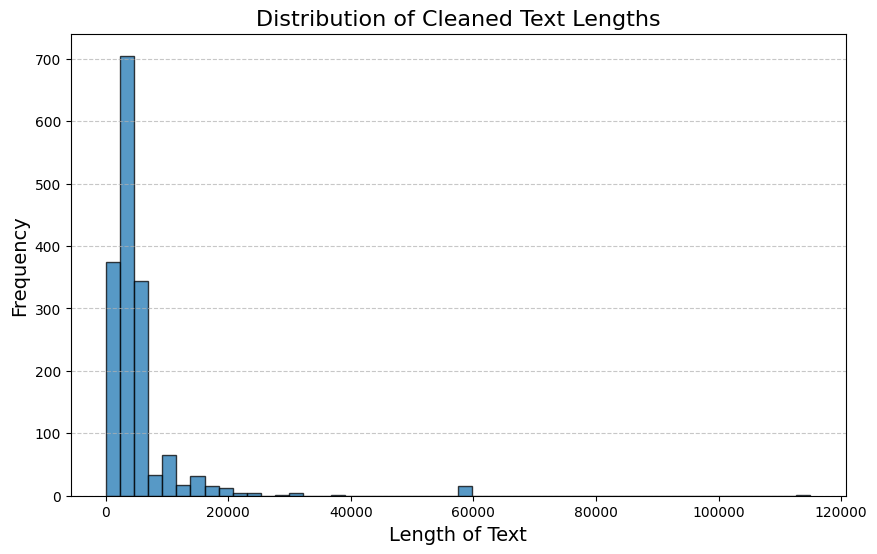

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['cleaned_text_length'], bins=50, alpha=0.75, edgecolor='black')
plt.title('Distribution of Cleaned Text Lengths', fontsize=16)
plt.xlabel('Length of Text', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [64]:
# Function to truncate the text as specified
def truncate_text(text,n):
    words = str(text).split()
    if len(words) > n:
        return ' '.join(words[:n] + words[-1*n:])
    return ' '.join(words)

df_cleaned['truncated_text'] = df_cleaned['cleaned_text'].apply(lambda x : truncate_text(text =x,n=500))


In [39]:
df_cleaned.head()

,Unnamed: 0,file_name,text,target,cleaned_text,cleaned_text_length,truncated_text
0,0,document_1000_fuses.pdf,www.littelfuse.com © 2012 Littelfuse • Transpo...,fuses,© littelfuse • transportation product catalog ...,1086,© littelfuse • transportation product catalog ...
2,2,document_1002_cable.pdf,"Product: 1855A \n \n75 Ohm SDI Coax, Mini RG-...",cable,product ohm sdi coax mini rg awg solid bc foil...,4067,product ohm sdi coax mini rg awg solid bc foil...
3,3,document_1003_cable.pdf,Product: 8240 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...,3312,product ohm wireless transmission coax rg awg ...
4,4,document_1004_cable.pdf,Product: 8240 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...,3312,product ohm wireless transmission coax rg awg ...
5,5,document_1005_cable.pdf,Product: 8259 \n \n50 Ohm Wireless Transmissi...,cable,product ohm wireless transmission coax rg awg ...,3013,product ohm wireless transmission coax rg awg ...


In [47]:
df_cleaned.to_csv('cleaned_truncated_data.csv')

In [42]:
import torch
print(torch.__version__)
print("CUDA available:", torch.cuda.is_available())


2.5.1+cpu
CUDA available: False


In [46]:
from transformers import pipeline

# Initialize a summarization pipeline using Hugging Face Transformers
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Function to summarize text to a maximum of 500 words
def summarize_text(text, max_words=500):
    try:
        # Convert the word count to an approximate character length
        max_length = max_words * 5  # Approximation: 5 characters per word
        summary = summarizer(text, max_length=max_length, min_length=50, do_sample=False)
        return summary[0]['summary_text']
    except Exception as e:
        print(f"Failed to summarize text: {e}")
        return None
df['summarized_text'] = df['cleaned_text'].apply(lambda x: summarize_text(x) if pd.notnull(x) else None)










RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load cleaned data
file_path = 'cleaned_truncated_data.csv'
df = pd.read_csv(file_path)

# Drop rows with missing values in required columns
df = df.dropna(subset=['truncated_text', 'target'])

# Split into features and target
X = df['truncated_text']
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load cleaned data
file_path = 'cleaned_truncated_data.csv'
df = pd.read_csv(file_path)

# Drop rows with missing values in required columns
df = df.dropna(subset=['cleaned_text', 'target'])

# Split into features and target
X = df['cleaned_text']
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the cleaned data
file_path = 'C:\Learning\Parsec\cleaned_truncated_data.csv'

if os.path.exists(file_path):
    # Load the DataFrame
    df = pd.read_csv(file_path)
    
    # Drop rows with missing values in required columns
    df = df.dropna(subset=['cleaned_text', 'target'])
    
    # Split into features and target
    X = df['cleaned_text']
    y = df['target']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # TF-IDF feature extraction
    tfidf = TfidfVectorizer(max_features=5000)
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    # Logistic Regression
    lr_model = LogisticRegression(max_iter=1000, random_state=42)
    lr_model.fit(X_train_tfidf, y_train)
    y_train_pred_lr = lr_model.predict(X_train_tfidf)
    y_test_pred_lr = lr_model.predict(X_test_tfidf)

    # SVM
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train_tfidf, y_train)
    y_train_pred_svm = svm_model.predict(X_train_tfidf)
    y_test_pred_svm = svm_model.predict(X_test_tfidf)

    # Classification reports
    print("Logistic Regression - Train Data Classification Report:")
    print(classification_report(y_train, y_train_pred_lr))
    print("\nLogistic Regression - Test Data Classification Report:")
    print(classification_report(y_test, y_test_pred_lr))

    print("\nSVM - Train Data Classification Report:")
    print(classification_report(y_train, y_train_pred_svm))
    print("\nSVM - Test Data Classification Report:")
    print(classification_report(y_test, y_test_pred_svm))

else:
    print(f"The file '{file_path}' does not exist.")


Logistic Regression - Train Data Classification Report:
              precision    recall  f1-score   support

       cable       1.00      1.00      1.00       316
       fuses       1.00      1.00      1.00       448
    lighting       1.00      1.00      1.00       301
      others       1.00      1.00      1.00       238

    accuracy                           1.00      1303
   macro avg       1.00      1.00      1.00      1303
weighted avg       1.00      1.00      1.00      1303


Logistic Regression - Test Data Classification Report:
              precision    recall  f1-score   support

       cable       1.00      0.99      0.99        79
       fuses       1.00      1.00      1.00       112
    lighting       1.00      1.00      1.00        76
      others       0.98      1.00      0.99        59

    accuracy                           1.00       326
   macro avg       1.00      1.00      1.00       326
weighted avg       1.00      1.00      1.00       326


SVM - Train Data 

In [65]:
from sklearn.metrics import f1_score

In [67]:
f1_score_train =[]
f1_score_test = []
trunc_x = [32,64,100,128,150,175,200,256,300,350, 400,450,500]
for i in trunc_x:
    print(i)
    df_cleaned['truncated_text'] = df_cleaned['cleaned_text'].apply(lambda x : truncate_text(text =x,n=i))
    X = df_cleaned['truncated_text']
    y = df_cleaned['target']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # TF-IDF feature extraction
    tfidf = TfidfVectorizer(max_features=5000)
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)


    # SVM
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train_tfidf, y_train)

    y_train_pred_svm = svm_model.predict(X_train_tfidf)
    y_test_pred_svm = svm_model.predict(X_test_tfidf)
    
    f1_score_train.append(f1_score(y_train, y_train_pred_svm, average='weighted'))
    f1_score_test.append(f1_score(y_test, y_test_pred_svm, average='weighted'))
    print('complete')

32
complete
64
complete
100
complete
128
complete
150
complete
175
complete
200
complete
256
complete
300
complete
350
complete
400
complete
450
complete
500
complete


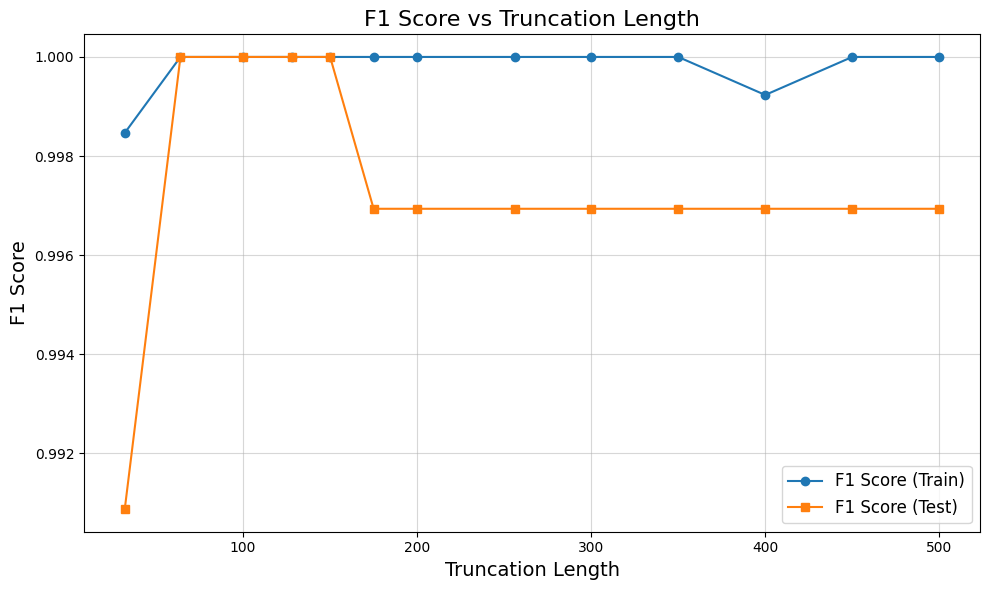

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(trunc_x, f1_score_train, label='F1 Score (Train)', marker='o')
plt.plot(trunc_x, f1_score_test, label='F1 Score (Test)', marker='s')

# Add titles and labels
plt.title('F1 Score vs Truncation Length', fontsize=16)
plt.xlabel('Truncation Length', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [121]:
f1_score_train =[]
f1_score_validation = []
f1_score_test =  []
trunc_x = [32,64,100,128,150,175,200,256,300,350, 400,450,500]
for i in trunc_x:
    print(i)
    df_cleaned = pd.read_csv('cleaned_data_with_pre_processed.csv')
    df_cleaned['truncated_text'] = df_cleaned['cleaned_text'].apply(lambda x : truncate_text(text =x,n=i))
    X = df_cleaned['truncated_text']
    y = df_cleaned['target']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    df_test = pd.read_csv('cleaned_truncated_data_test.csv')

    df_test['truncated_text'] = df_test['cleaned_text'].apply(lambda x : truncate_text(text =x,n=i))
    X_fin_test = df_test['truncated_text']
    y_fin_test = df_test['target']

    # TF-IDF feature extraction
    tfidf = TfidfVectorizer(max_features=800) 
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)


    # SVM
    # svm_model = SVC(kernel='linear', random_state=42)
    svm_model = SVC(kernel='rbf', random_state=42, C=0.1)
    svm_model.fit(X_train_tfidf, y_train)

    y_train_pred_svm = svm_model.predict(X_train_tfidf)
    y_test_pred_svm = svm_model.predict(X_test_tfidf)
    

    X_fin_test_tfidf = tfidf.transform(X_fin_test)
    y_fin_test_pred_svm = svm_model.predict(X_fin_test_tfidf)
    
    f1_score_train.append(f1_score(y_train, y_train_pred_svm, average='weighted'))
    f1_score_validation.append(f1_score(y_test, y_test_pred_svm, average='weighted'))
    f1_score_test.append(f1_score(y_fin_test, y_fin_test_pred_svm, average='weighted'))
    print('complete')

32
complete
64
complete
100
complete
128
complete
150
complete
175
complete
200
complete
256
complete
300
complete
350
complete
400
complete
450
complete
500
complete


In [120]:
df_cleaned = pd.read_csv('cleaned_data_with_pre_processed.csv')
df_cleaned.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'file_name', 'text', 'target',
       'cleaned_text'],
      dtype='object')

In [123]:
df_cleaned = pd.read_csv('cleaned_data_with_pre_processed.csv')
df_cleaned['truncated_text'] = df_cleaned['cleaned_text'].apply(lambda x : truncate_text(text =x,n=300))
X = df_cleaned['truncated_text']
y = df_cleaned['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

df_test = pd.read_csv('cleaned_truncated_data_test.csv')

df_test['truncated_text'] = df_test['cleaned_text'].apply(lambda x : truncate_text(text =x,n=i))
X_fin_test = df_test['truncated_text']
y_fin_test = df_test['target']

# TF-IDF feature extraction
tfidf = TfidfVectorizer(max_features=800) 
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# SVM
# svm_model = SVC(kernel='linear', random_state=42)
svm_model = SVC(kernel='rbf', random_state=42, C=0.1)
svm_model.fit(X_train_tfidf, y_train)

y_train_pred_svm = svm_model.predict(X_train_tfidf)
y_test_pred_svm = svm_model.predict(X_test_tfidf)


X_fin_test_tfidf = tfidf.transform(X_fin_test)
y_fin_test_pred_svm = svm_model.predict(X_fin_test_tfidf)

f1_score_train = f1_score(y_train, y_train_pred_svm, average='weighted')
f1_score_validation = f1_score(y_test, y_test_pred_svm, average='weighted')
f1_score_test = f1_score(y_fin_test, y_fin_test_pred_svm, average='weighted')

print('f1_score_train : ',f1_score_train)
print('f1_score_validation : ',f1_score_validation)
print('f1_score_test : ',f1_score_test)

f1_score_train :  0.9938944038673142
f1_score_validation :  0.9848576219300204
f1_score_test :  0.966732718104606


In [133]:
import joblib

In [137]:
model_path = './svm_model.joblib'
tfidf_path = './tfidf_vectorizer.joblib'
joblib.dump(svm_model, model_path)
joblib.dump(tfidf, tfidf_path)
print(f"SVM model saved to {model_path}.")
print(f"TF-IDF vectorizer saved to {tfidf_path}.")

SVM model saved to ./svm_model.joblib.
TF-IDF vectorizer saved to ./tfidf_vectorizer.joblib.


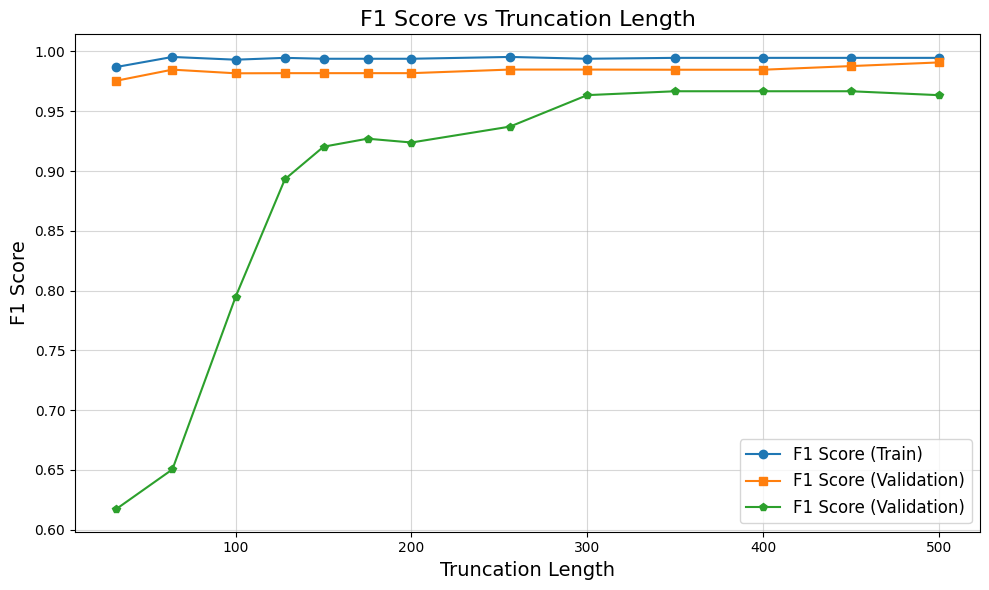

In [122]:
#800 c=1 rbf
plt.figure(figsize=(10, 6))
plt.plot(trunc_x, f1_score_train, label='F1 Score (Train)', marker='o')
plt.plot(trunc_x, f1_score_validation, label='F1 Score (Validation)', marker='s')
plt.plot(trunc_x, f1_score_test, label='F1 Score (Validation)', marker='p')

# Add titles and labels
plt.title('F1 Score vs Truncation Length', fontsize=16)
plt.xlabel('Truncation Length', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

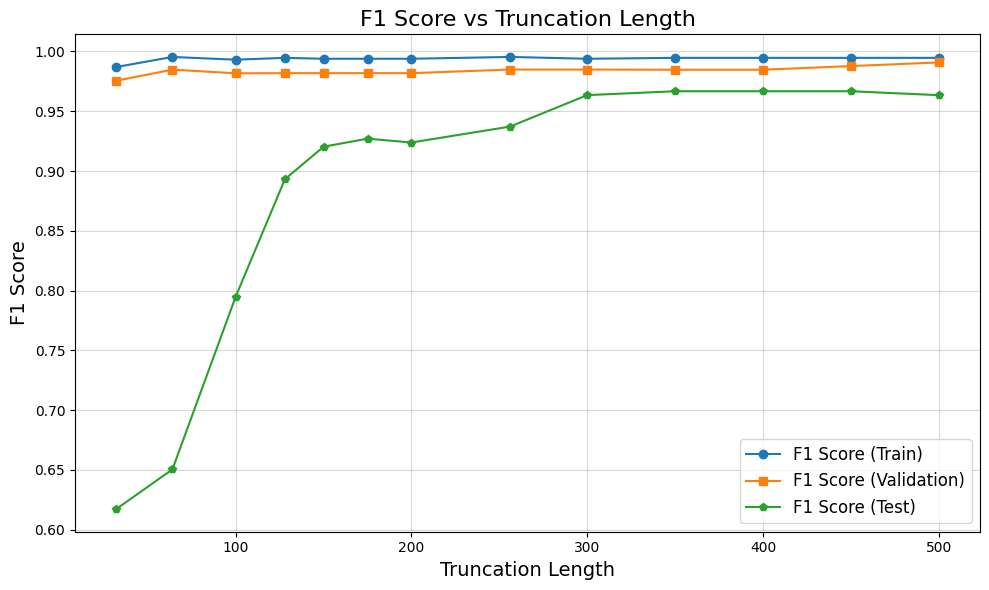

In [103]:
#1000
plt.figure(figsize=(10, 6))
plt.plot(trunc_x, f1_score_train, label='F1 Score (Train)', marker='o')
plt.plot(trunc_x, f1_score_validation, label='F1 Score (Validation)', marker='s')
plt.plot(trunc_x, f1_score_test, label='F1 Score (Test)', marker='p')

# Add titles and labels
plt.title('F1 Score vs Truncation Length', fontsize=16)
plt.xlabel('Truncation Length', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

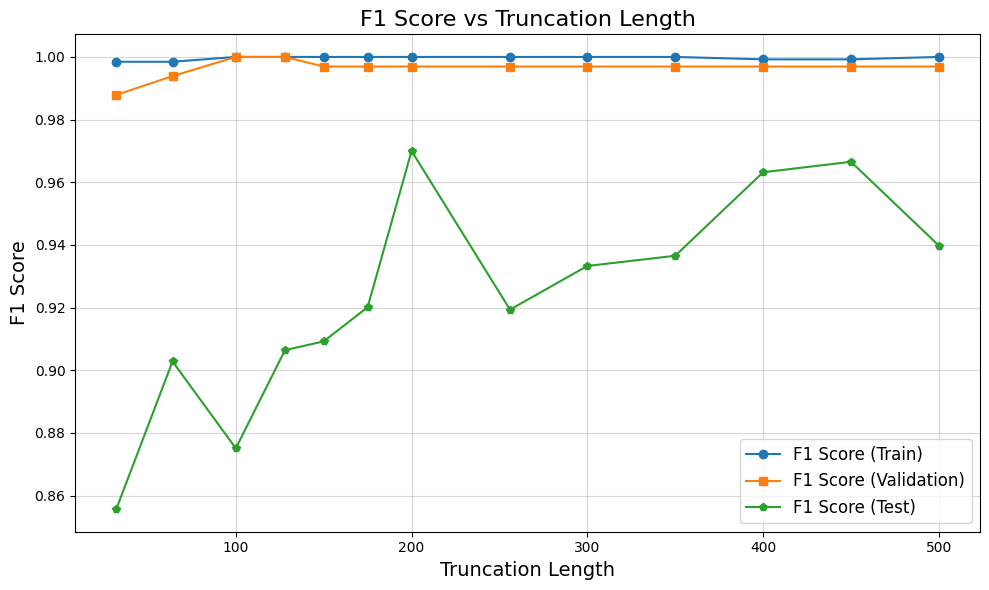

In [96]:
#800, i= 200, C= 1
plt.figure(figsize=(10, 6))
plt.plot(trunc_x, f1_score_train, label='F1 Score (Train)', marker='o')
plt.plot(trunc_x, f1_score_validation, label='F1 Score (Validation)', marker='s')
plt.plot(trunc_x, f1_score_test, label='F1 Score (Test)', marker='p')

# Add titles and labels
plt.title('F1 Score vs Truncation Length', fontsize=16)
plt.xlabel('Truncation Length', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [126]:
set(y_train)

{'cable', 'fuses', 'lighting', 'others'}

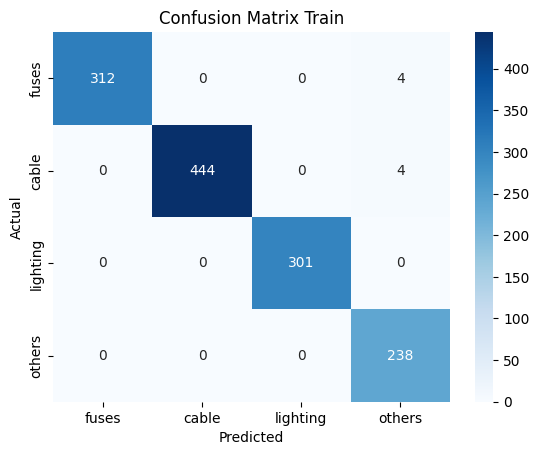

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
f1_score_train = f1_score(y_train, y_train_pred_svm, average='weighted')
f1_score_validation = f1_score(y_test, y_test_pred_svm, average='weighted')
f1_score_test = f1_score(y_fin_test, y_fin_test_pred_svm, average='weighted')

conf_matrix = confusion_matrix(y_train, y_train_pred_svm)
class_names = list(set(y_train))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Train')
plt.show()


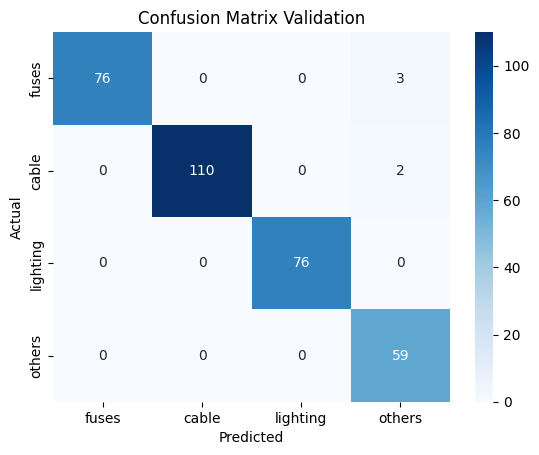

In [130]:

conf_matrix = confusion_matrix(y_test, y_test_pred_svm)
class_names = list(set(y_train))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Validation')
plt.show()

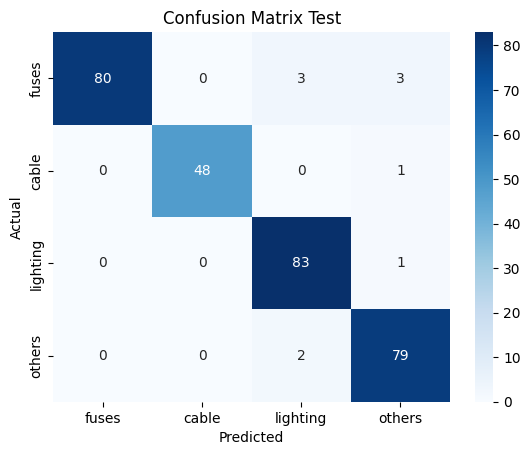

In [131]:


conf_matrix = confusion_matrix(y_fin_test, y_fin_test_pred_svm)
class_names = list(set(y_train))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test')
plt.show()